In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

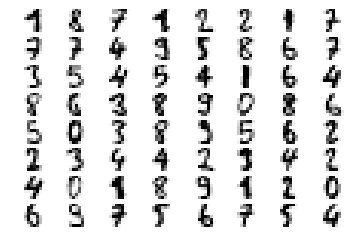

In [2]:
from random import randint

for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(digits.images[randint(0, digits.images.shape[0])], cmap='Greys')
plt.show()

In [3]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 300)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
#class1 = [0, 2, 4, 6, 8]
#winner1 = get_winner(class1)

In [7]:
winner_list = []
classes = [[0],[1],[2],[3],[4],[5],[6],[7],[8],[9]]

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:162
number of class2:1455

 ****** Running generation 0 ****** 

Population's average fitness: 0.57841 stdev: 0.28258
Best fitness: 0.94249 - size: (2, 13) - species 2 - id 12
Average adjusted fitness: 0.436
Mean genetic distance 2.916, standard deviation 0.511
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 6.911 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.73883 stdev: 0.22421
Best fitness: 0.95857 - size: (3, 15) - species 9 - id 364
Average adjusted fitness: 0.618
Mean genetic distance 3.036, standard deviation 0.546
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 10.005 sec (8.458 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.77584 stdev: 0.21410
Best fitness: 0.95857 - size: (3, 15) - species 7 - id 364
Average adjusted fitness: 0.669
Mean genetic distance 3.109, standard deviation 0.538
Population of 203 members in 32 species
Total extincti

Population's average fitness: 0.82518 stdev: 0.19711
Best fitness: 0.99134 - size: (5, 19) - species 30 - id 3099
Average adjusted fitness: 0.700
Mean genetic distance 3.223, standard deviation 0.568
Population of 193 members in 19 species
Total extinctions: 0
Generation time: 19.531 sec (16.422 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.82505 stdev: 0.18984
Best fitness: 0.99134 - size: (5, 19) - species 30 - id 3099
Average adjusted fitness: 0.679
Mean genetic distance 3.208, standard deviation 0.581
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 17.064 sec (16.563 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.83099 stdev: 0.18628
Best fitness: 0.99134 - size: (5, 19) - species 30 - id 3099
Average adjusted fitness: 0.702
Mean genetic distance 3.242, standard deviation 0.558
Population of 202 members in 19 species
Total extinctions: 0
Generation time: 18.815 sec (16.905 average)

 

Population's average fitness: 0.84579 stdev: 0.17745
Best fitness: 0.99443 - size: (13, 34) - species 40 - id 7255
Average adjusted fitness: 0.736
Mean genetic distance 3.192, standard deviation 0.564
Population of 204 members in 17 species
Total extinctions: 0
Generation time: 22.337 sec (21.753 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.84700 stdev: 0.18625
Best fitness: 0.99443 - size: (13, 34) - species 40 - id 7255
Average adjusted fitness: 0.742
Mean genetic distance 3.222, standard deviation 0.551
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 22.834 sec (21.864 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.83586 stdev: 0.20109
Best fitness: 0.99443 - size: (13, 34) - species 40 - id 7255
Average adjusted fitness: 0.727
Mean genetic distance 3.212, standard deviation 0.550
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 22.597 sec (21.810 average)

Population's average fitness: 0.85470 stdev: 0.17393
Best fitness: 0.99505 - size: (10, 27) - species 48 - id 10883
Average adjusted fitness: 0.678
Mean genetic distance 3.272, standard deviation 0.604
Population of 204 members in 15 species
Total extinctions: 0
Generation time: 25.798 sec (23.739 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.84703 stdev: 0.19185
Best fitness: 0.99505 - size: (10, 27) - species 48 - id 10883
Average adjusted fitness: 0.742
Mean genetic distance 3.282, standard deviation 0.612
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 26.199 sec (23.984 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.86644 stdev: 0.17437
Best fitness: 0.99505 - size: (14, 36) - species 40 - id 11907
Average adjusted fitness: 0.764
Mean genetic distance 3.271, standard deviation 0.603
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 23.634 sec (23.982 avera

Population's average fitness: 0.83303 stdev: 0.20989
Best fitness: 0.99567 - size: (10, 29) - species 48 - id 15373
Average adjusted fitness: 0.726
Mean genetic distance 3.204, standard deviation 0.579
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 27.352 sec (25.723 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.85404 stdev: 0.17904
Best fitness: 0.99567 - size: (10, 29) - species 76 - id 15373
Average adjusted fitness: 0.748
Mean genetic distance 3.134, standard deviation 0.577
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 25.378 sec (25.680 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.80914 stdev: 0.25035
Best fitness: 0.99567 - size: (10, 29) - species 76 - id 15373
Average adjusted fitness: 0.705
Mean genetic distance 3.153, standard deviation 0.579
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 29.387 sec (26.158 avera

Population's average fitness: 0.80983 stdev: 0.23143
Best fitness: 0.99567 - size: (10, 29) - species 76 - id 15373
Average adjusted fitness: 0.708
Mean genetic distance 3.056, standard deviation 0.536
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 27.864 sec (28.350 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.84604 stdev: 0.19757
Best fitness: 0.99567 - size: (10, 29) - species 76 - id 15373
Average adjusted fitness: 0.746
Mean genetic distance 3.068, standard deviation 0.578
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 27.539 sec (28.219 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.84525 stdev: 0.20622
Best fitness: 0.99567 - size: (10, 29) - species 76 - id 15373
Average adjusted fitness: 0.791
Mean genetic distance 3.072, standard deviation 0.592
Population of 195 members in 12 species
Total extinctions: 0
Generation time: 27.046 sec (28.034 ave

Population's average fitness: 0.84623 stdev: 0.20432
Best fitness: 0.99567 - size: (10, 29) - species 76 - id 15373
Average adjusted fitness: 0.744
Mean genetic distance 3.008, standard deviation 0.550
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 31.145 sec (30.069 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.84493 stdev: 0.21345
Best fitness: 0.99567 - size: (10, 29) - species 76 - id 15373
Average adjusted fitness: 0.723
Mean genetic distance 3.010, standard deviation 0.558
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 31.376 sec (30.305 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.83729 stdev: 0.22420
Best fitness: 0.99567 - size: (10, 29) - species 76 - id 15373
Average adjusted fitness: 0.754
Mean genetic distance 2.994, standard deviation 0.536
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 31.459 sec (30.557 ave

Population's average fitness: 0.83558 stdev: 0.23608
Best fitness: 0.99567 - size: (10, 29) - species 76 - id 15373
Average adjusted fitness: 0.733
Mean genetic distance 3.048, standard deviation 0.546
Population of 203 members in 16 species
Total extinctions: 0
Generation time: 35.062 sec (34.535 average)

 ****** Running generation 169 ****** 

Population's average fitness: 0.83044 stdev: 0.23456
Best fitness: 0.99567 - size: (10, 29) - species 76 - id 15373
Average adjusted fitness: 0.725
Mean genetic distance 3.039, standard deviation 0.543
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 35.117 sec (34.633 average)

 ****** Running generation 170 ****** 

Population's average fitness: 0.84101 stdev: 0.22123
Best fitness: 0.99567 - size: (10, 29) - species 76 - id 15373
Average adjusted fitness: 0.743
Mean genetic distance 3.057, standard deviation 0.528
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 34.378 sec (34.766 ave

Population's average fitness: 0.83653 stdev: 0.22472
Best fitness: 0.99567 - size: (10, 29) - species 76 - id 15373
Average adjusted fitness: 0.729
Mean genetic distance 2.857, standard deviation 0.522
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 35.943 sec (35.358 average)

 ****** Running generation 193 ****** 

Population's average fitness: 0.82603 stdev: 0.22833
Best fitness: 0.99567 - size: (10, 29) - species 76 - id 15373
Average adjusted fitness: 0.739
Mean genetic distance 2.885, standard deviation 0.503
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 35.922 sec (35.358 average)

 ****** Running generation 194 ****** 

Population's average fitness: 0.82837 stdev: 0.23030
Best fitness: 0.99567 - size: (10, 29) - species 76 - id 15373
Average adjusted fitness: 0.725
Mean genetic distance 2.860, standard deviation 0.524
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 35.557 sec (35.307 ave

Population's average fitness: 0.85104 stdev: 0.19654
Best fitness: 0.99567 - size: (10, 29) - species 76 - id 15373
Average adjusted fitness: 0.758
Mean genetic distance 2.786, standard deviation 0.437
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 38.983 sec (39.966 average)

 ****** Running generation 217 ****** 

Population's average fitness: 0.84859 stdev: 0.20129
Best fitness: 0.99567 - size: (10, 29) - species 76 - id 15373
Average adjusted fitness: 0.729
Mean genetic distance 2.805, standard deviation 0.448
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 38.769 sec (39.805 average)

 ****** Running generation 218 ****** 

Population's average fitness: 0.85436 stdev: 0.21055
Best fitness: 0.99567 - size: (10, 29) - species 76 - id 15373
Average adjusted fitness: 0.754
Mean genetic distance 2.820, standard deviation 0.464
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 38.410 sec (39.630 ave

Population's average fitness: 0.85753 stdev: 0.17739
Best fitness: 0.99567 - size: (10, 29) - species 76 - id 15373
Average adjusted fitness: 0.731
Mean genetic distance 2.825, standard deviation 0.522
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 28.711 sec (29.458 average)

 ****** Running generation 241 ****** 

Population's average fitness: 0.86478 stdev: 0.19529
Best fitness: 0.99567 - size: (10, 29) - species 76 - id 15373
Average adjusted fitness: 0.778
Mean genetic distance 2.804, standard deviation 0.515
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 29.270 sec (29.332 average)

 ****** Running generation 242 ****** 

Population's average fitness: 0.85594 stdev: 0.19426
Best fitness: 0.99567 - size: (10, 29) - species 76 - id 15373
Average adjusted fitness: 0.782
Mean genetic distance 2.776, standard deviation 0.535
Population of 197 members in 9 species
Total extinctions: 0
Generation time: 28.107 sec (29.112 averag

Population's average fitness: 0.86892 stdev: 0.18642
Best fitness: 0.99629 - size: (16, 39) - species 40 - id 42345
Average adjusted fitness: 0.755
Mean genetic distance 2.981, standard deviation 0.524
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 26.109 sec (25.159 average)

 ****** Running generation 265 ****** 

Population's average fitness: 0.86308 stdev: 0.18459
Best fitness: 0.99629 - size: (16, 39) - species 40 - id 42345
Average adjusted fitness: 0.743
Mean genetic distance 2.936, standard deviation 0.537
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 25.895 sec (25.362 average)

 ****** Running generation 266 ****** 

Population's average fitness: 0.83121 stdev: 0.23096
Best fitness: 0.99629 - size: (16, 39) - species 40 - id 42345
Average adjusted fitness: 0.729
Mean genetic distance 3.014, standard deviation 0.541
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 25.950 sec (25.551 ave

Population's average fitness: 0.85397 stdev: 0.19861
Best fitness: 0.99629 - size: (16, 39) - species 40 - id 42345
Average adjusted fitness: 0.748
Mean genetic distance 3.081, standard deviation 0.567
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 25.735 sec (26.435 average)

 ****** Running generation 289 ****** 

Population's average fitness: 0.86144 stdev: 0.19950
Best fitness: 0.99629 - size: (16, 39) - species 40 - id 42345
Average adjusted fitness: 0.763
Mean genetic distance 3.098, standard deviation 0.585
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 27.290 sec (26.568 average)

 ****** Running generation 290 ****** 

Population's average fitness: 0.86175 stdev: 0.19979
Best fitness: 0.99629 - size: (16, 39) - species 40 - id 42345
Average adjusted fitness: 0.746
Mean genetic distance 3.096, standard deviation 0.597
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 27.852 sec (26.615 ave

Population's average fitness: 0.81338 stdev: 0.18953
Best fitness: 0.94682 - size: (4, 19) - species 22 - id 1782
Average adjusted fitness: 0.693
Mean genetic distance 3.136, standard deviation 0.494
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 12.509 sec (12.283 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.82175 stdev: 0.19119
Best fitness: 0.94743 - size: (4, 20) - species 22 - id 2041
Average adjusted fitness: 0.708
Mean genetic distance 3.128, standard deviation 0.493
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 12.918 sec (12.433 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.82470 stdev: 0.18425
Best fitness: 0.94743 - size: (4, 20) - species 22 - id 2041
Average adjusted fitness: 0.707
Mean genetic distance 3.132, standard deviation 0.488
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 13.359 sec (12.582 average)

 

Population's average fitness: 0.83007 stdev: 0.17896
Best fitness: 0.94743 - size: (4, 20) - species 22 - id 2041
Average adjusted fitness: 0.727
Mean genetic distance 3.268, standard deviation 0.517
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 16.616 sec (15.829 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.82533 stdev: 0.18711
Best fitness: 0.94743 - size: (4, 20) - species 22 - id 2041
Average adjusted fitness: 0.719
Mean genetic distance 3.278, standard deviation 0.519
Population of 195 members in 22 species
Total extinctions: 0
Generation time: 16.386 sec (15.925 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.82550 stdev: 0.19183
Best fitness: 0.94743 - size: (4, 20) - species 22 - id 2041
Average adjusted fitness: 0.724
Mean genetic distance 3.298, standard deviation 0.532
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 16.151 sec (16.020 average)

 

Population's average fitness: 0.81432 stdev: 0.18266
Best fitness: 0.95114 - size: (5, 21) - species 45 - id 7868
Average adjusted fitness: 0.690
Mean genetic distance 3.157, standard deviation 0.616
Population of 196 members in 14 species
Total extinctions: 0
Generation time: 13.966 sec (13.527 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.82113 stdev: 0.17369
Best fitness: 0.95114 - size: (4, 19) - species 22 - id 9337
Average adjusted fitness: 0.699
Mean genetic distance 3.161, standard deviation 0.601
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 13.183 sec (13.448 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.79161 stdev: 0.22072
Best fitness: 0.95114 - size: (4, 19) - species 22 - id 9337
Average adjusted fitness: 0.689
Mean genetic distance 3.138, standard deviation 0.613
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 13.355 sec (13.388 average)

 

Population's average fitness: 0.79980 stdev: 0.22072
Best fitness: 0.95238 - size: (6, 22) - species 45 - id 11920
Average adjusted fitness: 0.695
Mean genetic distance 3.009, standard deviation 0.571
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 10.723 sec (11.011 average)

 ****** Running generation 85 ****** 

Population's average fitness: 0.85088 stdev: 0.14674
Best fitness: 0.95238 - size: (6, 22) - species 45 - id 11920
Average adjusted fitness: 0.751
Mean genetic distance 3.018, standard deviation 0.564
Population of 196 members in 14 species
Total extinctions: 0
Generation time: 10.893 sec (11.004 average)

 ****** Running generation 86 ****** 

Population's average fitness: 0.82410 stdev: 0.17548
Best fitness: 0.95238 - size: (6, 22) - species 45 - id 11920
Average adjusted fitness: 0.722
Mean genetic distance 3.014, standard deviation 0.561
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 11.052 sec (11.029 average)

Population's average fitness: 0.84578 stdev: 0.16220
Best fitness: 0.95733 - size: (10, 30) - species 56 - id 16182
Average adjusted fitness: 0.741
Mean genetic distance 3.052, standard deviation 0.520
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 12.627 sec (12.262 average)

 ****** Running generation 109 ****** 

Population's average fitness: 0.79431 stdev: 0.21885
Best fitness: 0.95733 - size: (10, 30) - species 56 - id 16182
Average adjusted fitness: 0.690
Mean genetic distance 3.048, standard deviation 0.526
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 12.704 sec (12.317 average)

 ****** Running generation 110 ****** 

Population's average fitness: 0.83446 stdev: 0.17723
Best fitness: 0.95733 - size: (10, 30) - species 56 - id 16182
Average adjusted fitness: 0.744
Mean genetic distance 3.054, standard deviation 0.512
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 12.262 sec (12.341 ave

Population's average fitness: 0.83110 stdev: 0.19853
Best fitness: 0.95733 - size: (10, 30) - species 56 - id 16182
Average adjusted fitness: 0.731
Mean genetic distance 3.037, standard deviation 0.542
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 12.265 sec (12.405 average)

 ****** Running generation 133 ****** 

Population's average fitness: 0.84253 stdev: 0.17661
Best fitness: 0.95733 - size: (10, 30) - species 56 - id 16182
Average adjusted fitness: 0.744
Mean genetic distance 3.022, standard deviation 0.537
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 12.155 sec (12.390 average)

 ****** Running generation 134 ****** 

Population's average fitness: 0.85783 stdev: 0.16746
Best fitness: 0.95795 - size: (9, 29) - species 81 - id 21586
Average adjusted fitness: 0.758
Mean genetic distance 3.035, standard deviation 0.522
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 12.468 sec (12.416 aver

Population's average fitness: 0.83770 stdev: 0.19179
Best fitness: 0.95795 - size: (9, 29) - species 81 - id 21586
Average adjusted fitness: 0.748
Mean genetic distance 3.094, standard deviation 0.567
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 13.821 sec (13.408 average)

 ****** Running generation 157 ****** 

Population's average fitness: 0.81813 stdev: 0.20781
Best fitness: 0.95795 - size: (9, 29) - species 81 - id 21586
Average adjusted fitness: 0.712
Mean genetic distance 3.100, standard deviation 0.553
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 13.735 sec (13.447 average)

 ****** Running generation 158 ****** 

Population's average fitness: 0.84347 stdev: 0.17474
Best fitness: 0.95795 - size: (9, 29) - species 81 - id 21586
Average adjusted fitness: 0.741
Mean genetic distance 3.088, standard deviation 0.553
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 13.982 sec (13.506 averag

Population's average fitness: 0.85087 stdev: 0.15721
Best fitness: 0.95795 - size: (15, 41) - species 92 - id 28582
Average adjusted fitness: 0.732
Mean genetic distance 3.155, standard deviation 0.606
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 15.424 sec (14.830 average)

 ****** Running generation 181 ****** 

Population's average fitness: 0.84858 stdev: 0.16345
Best fitness: 0.95795 - size: (15, 41) - species 92 - id 28582
Average adjusted fitness: 0.752
Mean genetic distance 3.174, standard deviation 0.606
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 15.528 sec (14.941 average)

 ****** Running generation 182 ****** 

Population's average fitness: 0.83468 stdev: 0.19152
Best fitness: 0.95795 - size: (15, 41) - species 92 - id 28582
Average adjusted fitness: 0.727
Mean genetic distance 3.166, standard deviation 0.603
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 15.792 sec (15.079 ave

Population's average fitness: 0.83180 stdev: 0.19243
Best fitness: 0.95795 - size: (15, 41) - species 92 - id 28582
Average adjusted fitness: 0.728
Mean genetic distance 2.982, standard deviation 0.587
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 15.854 sec (16.046 average)

 ****** Running generation 205 ****** 

Population's average fitness: 0.82065 stdev: 0.19295
Best fitness: 0.95795 - size: (15, 41) - species 92 - id 28582
Average adjusted fitness: 0.684
Mean genetic distance 3.003, standard deviation 0.574
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 15.414 sec (15.979 average)

 ****** Running generation 206 ****** 

Population's average fitness: 0.82202 stdev: 0.19241
Best fitness: 0.95795 - size: (12, 32) - species 103 - id 26574
Average adjusted fitness: 0.738
Mean genetic distance 2.977, standard deviation 0.589
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 15.312 sec (15.895 av

Mean genetic distance 2.877, standard deviation 0.529
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 15.240 sec (15.336 average)

 ****** Running generation 228 ****** 

Population's average fitness: 0.82498 stdev: 0.19022
Best fitness: 0.95795 - size: (12, 32) - species 103 - id 26574
Average adjusted fitness: 0.726
Mean genetic distance 2.875, standard deviation 0.518
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 15.614 sec (15.374 average)

 ****** Running generation 229 ****** 

Population's average fitness: 0.85606 stdev: 0.14471
Best fitness: 0.95795 - size: (12, 32) - species 103 - id 26574
Average adjusted fitness: 0.756
Mean genetic distance 2.859, standard deviation 0.524
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 15.648 sec (15.436 average)

 ****** Running generation 230 ****** 

Population's average fitness: 0.83226 stdev: 0.16797
Best fitness: 0.95795 - size: (12, 32) - speci

Population's average fitness: 0.83601 stdev: 0.17988
Best fitness: 0.95795 - size: (12, 32) - species 103 - id 26574
Average adjusted fitness: 0.739
Mean genetic distance 2.784, standard deviation 0.541
Population of 196 members in 12 species
Total extinctions: 0
Generation time: 15.018 sec (15.365 average)

 ****** Running generation 252 ****** 

Population's average fitness: 0.84456 stdev: 0.16765
Best fitness: 0.95795 - size: (12, 32) - species 103 - id 26574
Average adjusted fitness: 0.757
Mean genetic distance 2.800, standard deviation 0.547
Population of 196 members in 12 species
Total extinctions: 0
Generation time: 14.905 sec (15.294 average)

 ****** Running generation 253 ****** 

Population's average fitness: 0.82906 stdev: 0.20965
Best fitness: 0.95795 - size: (12, 32) - species 103 - id 26574
Average adjusted fitness: 0.732
Mean genetic distance 2.822, standard deviation 0.556
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 14.485 sec (15.202 

Mean genetic distance 3.048, standard deviation 0.550
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 13.476 sec (13.641 average)

 ****** Running generation 275 ****** 

Population's average fitness: 0.85010 stdev: 0.17241
Best fitness: 0.95857 - size: (12, 33) - species 103 - id 45606
Average adjusted fitness: 0.759
Mean genetic distance 3.035, standard deviation 0.570
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 12.909 sec (13.519 average)

 ****** Running generation 276 ****** 

Population's average fitness: 0.88247 stdev: 0.11627
Best fitness: 0.95857 - size: (12, 33) - species 103 - id 45606
Average adjusted fitness: 0.782
Mean genetic distance 3.025, standard deviation 0.565
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 12.471 sec (13.396 average)

 ****** Running generation 277 ****** 

Population's average fitness: 0.86141 stdev: 0.15265
Best fitness: 0.95857 - size: (12, 33) - speci

Population's average fitness: 0.85340 stdev: 0.14710
Best fitness: 0.95980 - size: (13, 35) - species 103 - id 48428
Average adjusted fitness: 0.752
Mean genetic distance 2.886, standard deviation 0.496
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 13.562 sec (12.823 average)

 ****** Running generation 299 ****** 

Population's average fitness: 0.84456 stdev: 0.17131
Best fitness: 0.95980 - size: (13, 35) - species 103 - id 48428
Average adjusted fitness: 0.719
Mean genetic distance 2.856, standard deviation 0.506
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 13.523 sec (12.870 average)
number of class1:160
number of class2:1457

 ****** Running generation 0 ****** 

Population's average fitness: 0.56226 stdev: 0.27316
Best fitness: 0.90229 - size: (2, 13) - species 1 - id 104
Average adjusted fitness: 0.513
Mean genetic distance 2.878, standard deviation 0.487
Population of 199 members in 21 species
Total extinctions: 0


Mean genetic distance 3.068, standard deviation 0.510
Population of 195 members in 25 species
Total extinctions: 0
Generation time: 8.769 sec (8.474 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.83470 stdev: 0.15830
Best fitness: 0.95053 - size: (8, 27) - species 4 - id 2018
Average adjusted fitness: 0.687
Mean genetic distance 3.036, standard deviation 0.517
Population of 195 members in 23 species
Total extinctions: 0
Generation time: 8.820 sec (8.540 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.86831 stdev: 0.09564
Best fitness: 0.95053 - size: (8, 27) - species 4 - id 2018
Average adjusted fitness: 0.576
Mean genetic distance 3.010, standard deviation 0.525
Population of 207 members in 21 species
Total extinctions: 0
Generation time: 8.997 sec (8.583 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.81290 stdev: 0.19120
Best fitness: 0.95053 - size: (8, 27) - species 4 - id 2018
Ave

Mean genetic distance 3.196, standard deviation 0.579
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 10.843 sec (10.517 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.82378 stdev: 0.17365
Best fitness: 0.96413 - size: (9, 30) - species 45 - id 6836
Average adjusted fitness: 0.724
Mean genetic distance 3.187, standard deviation 0.572
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 10.575 sec (10.533 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.80652 stdev: 0.19820
Best fitness: 0.96413 - size: (9, 30) - species 45 - id 6836
Average adjusted fitness: 0.708
Mean genetic distance 3.205, standard deviation 0.576
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 10.954 sec (10.592 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.80512 stdev: 0.19643
Best fitness: 0.96413 - size: (9, 30) - species 45 - id

Mean genetic distance 3.196, standard deviation 0.564
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 12.051 sec (11.481 average)

 ****** Running generation 71 ****** 

Population's average fitness: 0.85061 stdev: 0.14386
Best fitness: 0.96413 - size: (9, 30) - species 45 - id 6836
Average adjusted fitness: 0.691
Mean genetic distance 3.187, standard deviation 0.557
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 11.562 sec (11.528 average)

 ****** Running generation 72 ****** 

Population's average fitness: 0.84895 stdev: 0.14459
Best fitness: 0.96413 - size: (9, 30) - species 45 - id 6836
Average adjusted fitness: 0.703
Mean genetic distance 3.161, standard deviation 0.568
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 11.653 sec (11.626 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.82290 stdev: 0.18544
Best fitness: 0.96413 - size: (9, 30) - species 45 - id

Mean genetic distance 3.217, standard deviation 0.632
Population of 195 members in 13 species
Total extinctions: 0
Generation time: 12.909 sec (13.111 average)

 ****** Running generation 95 ****** 

Population's average fitness: 0.82871 stdev: 0.17137
Best fitness: 0.96413 - size: (13, 37) - species 50 - id 13544
Average adjusted fitness: 0.722
Mean genetic distance 3.190, standard deviation 0.644
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 12.389 sec (13.058 average)

 ****** Running generation 96 ****** 

Population's average fitness: 0.81279 stdev: 0.18675
Best fitness: 0.96413 - size: (13, 37) - species 50 - id 13544
Average adjusted fitness: 0.704
Mean genetic distance 3.169, standard deviation 0.654
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 13.140 sec (13.066 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.79550 stdev: 0.20255
Best fitness: 0.96413 - size: (13, 37) - species 50

Population's average fitness: 0.79816 stdev: 0.20303
Best fitness: 0.96413 - size: (13, 37) - species 50 - id 13544
Average adjusted fitness: 0.685
Mean genetic distance 3.039, standard deviation 0.554
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 13.280 sec (13.343 average)

 ****** Running generation 119 ****** 

Population's average fitness: 0.81873 stdev: 0.17252
Best fitness: 0.96413 - size: (13, 37) - species 50 - id 13544
Average adjusted fitness: 0.695
Mean genetic distance 3.081, standard deviation 0.554
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 13.293 sec (13.301 average)

 ****** Running generation 120 ****** 

Population's average fitness: 0.81700 stdev: 0.18520
Best fitness: 0.96413 - size: (13, 37) - species 50 - id 13544
Average adjusted fitness: 0.712
Mean genetic distance 3.090, standard deviation 0.575
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 13.454 sec (13.290 ave

Population's average fitness: 0.85154 stdev: 0.13594
Best fitness: 0.97155 - size: (10, 30) - species 45 - id 19886
Average adjusted fitness: 0.682
Mean genetic distance 3.143, standard deviation 0.600
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 14.289 sec (14.305 average)

 ****** Running generation 143 ****** 

Population's average fitness: 0.82999 stdev: 0.15319
Best fitness: 0.97155 - size: (10, 30) - species 45 - id 19886
Average adjusted fitness: 0.667
Mean genetic distance 3.158, standard deviation 0.618
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 14.123 sec (14.273 average)

 ****** Running generation 144 ****** 

Population's average fitness: 0.79378 stdev: 0.21663
Best fitness: 0.97155 - size: (10, 30) - species 45 - id 19886
Average adjusted fitness: 0.688
Mean genetic distance 3.158, standard deviation 0.608
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 14.793 sec (14.337 ave

Population's average fitness: 0.83236 stdev: 0.15186
Best fitness: 0.97155 - size: (10, 30) - species 45 - id 19886
Average adjusted fitness: 0.676
Mean genetic distance 3.087, standard deviation 0.577
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 14.478 sec (14.283 average)

 ****** Running generation 167 ****** 

Population's average fitness: 0.82714 stdev: 0.16790
Best fitness: 0.97155 - size: (10, 30) - species 45 - id 19886
Average adjusted fitness: 0.729
Mean genetic distance 3.089, standard deviation 0.569
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 14.784 sec (14.401 average)

 ****** Running generation 168 ****** 

Population's average fitness: 0.83667 stdev: 0.15246
Best fitness: 0.97155 - size: (10, 30) - species 45 - id 19886
Average adjusted fitness: 0.700
Mean genetic distance 3.070, standard deviation 0.591
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 15.145 sec (14.488 ave

Population's average fitness: 0.82563 stdev: 0.16628
Best fitness: 0.97155 - size: (10, 30) - species 45 - id 19886
Average adjusted fitness: 0.727
Mean genetic distance 3.069, standard deviation 0.533
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 16.106 sec (15.402 average)

 ****** Running generation 191 ****** 

Population's average fitness: 0.82799 stdev: 0.18092
Best fitness: 0.97155 - size: (10, 30) - species 45 - id 19886
Average adjusted fitness: 0.726
Mean genetic distance 3.054, standard deviation 0.524
Population of 205 members in 11 species
Total extinctions: 0
Generation time: 16.255 sec (15.491 average)

 ****** Running generation 192 ****** 

Population's average fitness: 0.82496 stdev: 0.16879
Best fitness: 0.97155 - size: (10, 30) - species 45 - id 19886
Average adjusted fitness: 0.722
Mean genetic distance 3.062, standard deviation 0.539
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 16.548 sec (15.635 ave

Population's average fitness: 0.81834 stdev: 0.18640
Best fitness: 0.97155 - size: (10, 30) - species 45 - id 19886
Average adjusted fitness: 0.701
Mean genetic distance 3.030, standard deviation 0.607
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 16.408 sec (15.635 average)

 ****** Running generation 215 ****** 

Population's average fitness: 0.82564 stdev: 0.17457
Best fitness: 0.97155 - size: (10, 30) - species 45 - id 19886
Average adjusted fitness: 0.717
Mean genetic distance 3.043, standard deviation 0.615
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 15.891 sec (15.711 average)

 ****** Running generation 216 ****** 

Population's average fitness: 0.83656 stdev: 0.15942
Best fitness: 0.97155 - size: (10, 30) - species 45 - id 19886
Average adjusted fitness: 0.711
Mean genetic distance 3.021, standard deviation 0.606
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 17.063 sec (15.890 ave

Population's average fitness: 0.83248 stdev: 0.17032
Best fitness: 0.97155 - size: (10, 30) - species 45 - id 19886
Average adjusted fitness: 0.738
Mean genetic distance 2.843, standard deviation 0.528
Population of 196 members in 13 species
Total extinctions: 0
Generation time: 16.029 sec (16.941 average)

 ****** Running generation 239 ****** 

Population's average fitness: 0.80691 stdev: 0.19978
Best fitness: 0.97155 - size: (10, 30) - species 45 - id 19886
Average adjusted fitness: 0.707
Mean genetic distance 2.853, standard deviation 0.518
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 15.586 sec (16.829 average)

 ****** Running generation 240 ****** 

Population's average fitness: 0.82211 stdev: 0.18754
Best fitness: 0.97155 - size: (10, 30) - species 45 - id 19886
Average adjusted fitness: 0.721
Mean genetic distance 2.866, standard deviation 0.512
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 16.111 sec (16.734 ave

Population's average fitness: 0.83863 stdev: 0.16356
Best fitness: 0.97217 - size: (11, 32) - species 45 - id 42681
Average adjusted fitness: 0.740
Mean genetic distance 2.895, standard deviation 0.563
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 16.927 sec (16.760 average)

 ****** Running generation 263 ****** 

Population's average fitness: 0.81904 stdev: 0.19230
Best fitness: 0.97217 - size: (11, 32) - species 45 - id 42681
Average adjusted fitness: 0.715
Mean genetic distance 2.903, standard deviation 0.547
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 16.961 sec (16.833 average)

 ****** Running generation 264 ****** 

Population's average fitness: 0.80846 stdev: 0.19470
Best fitness: 0.97217 - size: (11, 32) - species 45 - id 42681
Average adjusted fitness: 0.707
Mean genetic distance 2.929, standard deviation 0.516
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 17.624 sec (16.973 ave

Population's average fitness: 0.81366 stdev: 0.19120
Best fitness: 0.97279 - size: (11, 33) - species 45 - id 45786
Average adjusted fitness: 0.678
Mean genetic distance 2.926, standard deviation 0.507
Population of 195 members in 13 species
Total extinctions: 0
Generation time: 16.563 sec (16.765 average)

 ****** Running generation 287 ****** 

Population's average fitness: 0.81020 stdev: 0.20480
Best fitness: 0.97279 - size: (11, 33) - species 45 - id 45786
Average adjusted fitness: 0.691
Mean genetic distance 2.935, standard deviation 0.502
Population of 195 members in 14 species
Total extinctions: 0
Generation time: 16.510 sec (16.743 average)

 ****** Running generation 288 ****** 

Population's average fitness: 0.81347 stdev: 0.18933
Best fitness: 0.97279 - size: (11, 33) - species 45 - id 45786
Average adjusted fitness: 0.713
Mean genetic distance 2.935, standard deviation 0.523
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 16.421 sec (16.600 ave

Population's average fitness: 0.82464 stdev: 0.18144
Best fitness: 0.94929 - size: (3, 16) - species 7 - id 698
Average adjusted fitness: 0.710
Mean genetic distance 3.033, standard deviation 0.519
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 7.869 sec (7.658 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.82925 stdev: 0.17569
Best fitness: 0.94929 - size: (3, 16) - species 7 - id 698
Average adjusted fitness: 0.700
Mean genetic distance 3.051, standard deviation 0.505
Population of 205 members in 35 species
Total extinctions: 0
Generation time: 8.628 sec (7.829 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.83829 stdev: 0.16177
Best fitness: 0.94929 - size: (3, 16) - species 7 - id 698
Average adjusted fitness: 0.722
Mean genetic distance 3.039, standard deviation 0.511
Population of 206 members in 35 species
Total extinctions: 0
Generation time: 8.568 sec (7.966 average)

 ****** Runni

Population's average fitness: 0.82450 stdev: 0.17889
Best fitness: 0.96908 - size: (4, 16) - species 7 - id 3118
Average adjusted fitness: 0.721
Mean genetic distance 3.180, standard deviation 0.573
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 10.128 sec (9.759 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.83116 stdev: 0.17200
Best fitness: 0.96908 - size: (4, 16) - species 7 - id 3118
Average adjusted fitness: 0.725
Mean genetic distance 3.224, standard deviation 0.577
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 10.128 sec (9.852 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.82204 stdev: 0.18408
Best fitness: 0.96908 - size: (4, 16) - species 7 - id 3118
Average adjusted fitness: 0.717
Mean genetic distance 3.228, standard deviation 0.554
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 10.147 sec (9.908 average)

 ******

Population's average fitness: 0.81009 stdev: 0.21697
Best fitness: 0.97032 - size: (13, 33) - species 37 - id 8345
Average adjusted fitness: 0.719
Mean genetic distance 3.248, standard deviation 0.577
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 10.915 sec (10.733 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.82313 stdev: 0.19249
Best fitness: 0.97032 - size: (13, 33) - species 37 - id 8345
Average adjusted fitness: 0.708
Mean genetic distance 3.218, standard deviation 0.608
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 10.647 sec (10.744 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.77656 stdev: 0.22689
Best fitness: 0.97032 - size: (13, 33) - species 37 - id 8345
Average adjusted fitness: 0.641
Mean genetic distance 3.230, standard deviation 0.587
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 10.803 sec (10.739 average)

Population's average fitness: 0.79152 stdev: 0.21483
Best fitness: 0.97774 - size: (14, 35) - species 37 - id 9341
Average adjusted fitness: 0.709
Mean genetic distance 3.208, standard deviation 0.584
Population of 204 members in 14 species
Total extinctions: 0
Generation time: 13.568 sec (13.433 average)

 ****** Running generation 83 ****** 

Population's average fitness: 0.84354 stdev: 0.17164
Best fitness: 0.97774 - size: (14, 35) - species 37 - id 9341
Average adjusted fitness: 0.751
Mean genetic distance 3.200, standard deviation 0.595
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 13.645 sec (13.576 average)

 ****** Running generation 84 ****** 

Population's average fitness: 0.83932 stdev: 0.18108
Best fitness: 0.97774 - size: (14, 35) - species 37 - id 9341
Average adjusted fitness: 0.754
Mean genetic distance 3.211, standard deviation 0.612
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 13.795 sec (13.718 average)

Population's average fitness: 0.85367 stdev: 0.15337
Best fitness: 0.97774 - size: (14, 35) - species 37 - id 9341
Average adjusted fitness: 0.753
Mean genetic distance 3.153, standard deviation 0.663
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 15.638 sec (14.901 average)

 ****** Running generation 107 ****** 

Population's average fitness: 0.85389 stdev: 0.16711
Best fitness: 0.97774 - size: (14, 35) - species 37 - id 9341
Average adjusted fitness: 0.748
Mean genetic distance 3.210, standard deviation 0.619
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 15.987 sec (14.996 average)

 ****** Running generation 108 ****** 

Population's average fitness: 0.85504 stdev: 0.15579
Best fitness: 0.97774 - size: (14, 35) - species 37 - id 9341
Average adjusted fitness: 0.732
Mean genetic distance 3.205, standard deviation 0.620
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 16.061 sec (15.128 averag

Population's average fitness: 0.85763 stdev: 0.14777
Best fitness: 0.97774 - size: (14, 35) - species 37 - id 9341
Average adjusted fitness: 0.769
Mean genetic distance 3.251, standard deviation 0.664
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 16.784 sec (16.380 average)

 ****** Running generation 131 ****** 

Population's average fitness: 0.84693 stdev: 0.17082
Best fitness: 0.97774 - size: (14, 35) - species 37 - id 9341
Average adjusted fitness: 0.748
Mean genetic distance 3.267, standard deviation 0.658
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 16.466 sec (16.379 average)

 ****** Running generation 132 ****** 

Population's average fitness: 0.84092 stdev: 0.16196
Best fitness: 0.97774 - size: (14, 35) - species 37 - id 9341
Average adjusted fitness: 0.700
Mean genetic distance 3.215, standard deviation 0.678
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 16.401 sec (16.451 averag

Population's average fitness: 0.85793 stdev: 0.15684
Best fitness: 0.97774 - size: (14, 35) - species 37 - id 9341
Average adjusted fitness: 0.759
Mean genetic distance 3.070, standard deviation 0.652
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 16.161 sec (16.008 average)

 ****** Running generation 155 ****** 

Population's average fitness: 0.83749 stdev: 0.17628
Best fitness: 0.97774 - size: (14, 35) - species 37 - id 9341
Average adjusted fitness: 0.665
Mean genetic distance 3.074, standard deviation 0.663
Population of 197 members in 11 species
Total extinctions: 0
Generation time: 15.716 sec (15.994 average)

 ****** Running generation 156 ****** 

Population's average fitness: 0.83905 stdev: 0.18779
Best fitness: 0.97774 - size: (14, 35) - species 37 - id 9341
Average adjusted fitness: 0.732
Mean genetic distance 3.041, standard deviation 0.656
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 15.432 sec (15.994 averag

Population's average fitness: 0.83745 stdev: 0.17539
Best fitness: 0.97774 - size: (14, 35) - species 37 - id 9341
Average adjusted fitness: 0.735
Mean genetic distance 3.017, standard deviation 0.634
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 13.496 sec (13.847 average)

 ****** Running generation 179 ****** 

Population's average fitness: 0.84826 stdev: 0.16466
Best fitness: 0.97774 - size: (14, 35) - species 37 - id 9341
Average adjusted fitness: 0.742
Mean genetic distance 3.027, standard deviation 0.629
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 13.546 sec (13.803 average)

 ****** Running generation 180 ****** 

Population's average fitness: 0.86322 stdev: 0.12874
Best fitness: 0.97774 - size: (14, 35) - species 37 - id 9341
Average adjusted fitness: 0.759
Mean genetic distance 3.022, standard deviation 0.616
Population of 196 members in 13 species
Total extinctions: 0
Generation time: 13.779 sec (13.636 averag

Population's average fitness: 0.85502 stdev: 0.14682
Best fitness: 0.97774 - size: (14, 35) - species 37 - id 9341
Average adjusted fitness: 0.755
Mean genetic distance 2.985, standard deviation 0.593
Population of 197 members in 10 species
Total extinctions: 0
Generation time: 18.370 sec (17.442 average)

 ****** Running generation 203 ****** 

Population's average fitness: 0.83484 stdev: 0.16121
Best fitness: 0.97774 - size: (14, 35) - species 37 - id 9341
Average adjusted fitness: 0.733
Mean genetic distance 2.965, standard deviation 0.621
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 17.931 sec (17.533 average)

 ****** Running generation 204 ****** 

Population's average fitness: 0.85420 stdev: 0.16574
Best fitness: 0.97774 - size: (14, 35) - species 37 - id 9341
Average adjusted fitness: 0.751
Mean genetic distance 2.981, standard deviation 0.609
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 18.087 sec (17.644 averag

Population's average fitness: 0.82893 stdev: 0.17445
Best fitness: 0.97959 - size: (22, 54) - species 85 - id 35560
Average adjusted fitness: 0.731
Mean genetic distance 2.958, standard deviation 0.613
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 18.466 sec (17.960 average)

 ****** Running generation 227 ****** 

Population's average fitness: 0.83690 stdev: 0.16764
Best fitness: 0.97959 - size: (22, 54) - species 85 - id 35560
Average adjusted fitness: 0.737
Mean genetic distance 2.975, standard deviation 0.627
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 17.893 sec (17.928 average)

 ****** Running generation 228 ****** 

Population's average fitness: 0.84121 stdev: 0.17446
Best fitness: 0.97959 - size: (22, 54) - species 85 - id 35560
Average adjusted fitness: 0.743
Mean genetic distance 2.985, standard deviation 0.620
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 18.084 sec (17.916 aver

Population's average fitness: 0.83820 stdev: 0.16195
Best fitness: 0.97959 - size: (22, 54) - species 85 - id 35560
Average adjusted fitness: 0.740
Mean genetic distance 2.939, standard deviation 0.574
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 19.417 sec (19.349 average)

 ****** Running generation 251 ****** 

Population's average fitness: 0.83907 stdev: 0.16566
Best fitness: 0.97959 - size: (22, 54) - species 85 - id 35560
Average adjusted fitness: 0.724
Mean genetic distance 2.930, standard deviation 0.503
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 19.568 sec (19.358 average)

 ****** Running generation 252 ****** 

Population's average fitness: 0.85509 stdev: 0.15106
Best fitness: 0.97959 - size: (22, 54) - species 85 - id 35560
Average adjusted fitness: 0.745
Mean genetic distance 2.898, standard deviation 0.514
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 19.290 sec (19.380 ave

Population's average fitness: 0.85788 stdev: 0.15398
Best fitness: 0.97959 - size: (22, 54) - species 85 - id 35560
Average adjusted fitness: 0.750
Mean genetic distance 2.988, standard deviation 0.569
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 18.496 sec (18.609 average)

 ****** Running generation 275 ****** 

Population's average fitness: 0.84244 stdev: 0.17566
Best fitness: 0.97959 - size: (22, 54) - species 85 - id 35560
Average adjusted fitness: 0.793
Mean genetic distance 2.994, standard deviation 0.555
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 19.760 sec (18.745 average)

 ****** Running generation 276 ****** 

Population's average fitness: 0.84613 stdev: 0.16278
Best fitness: 0.97959 - size: (22, 54) - species 85 - id 35560
Average adjusted fitness: 0.749
Mean genetic distance 3.016, standard deviation 0.557
Population of 196 members in 13 species
Total extinctions: 0
Generation time: 19.217 sec (18.806 ave

Population's average fitness: 0.87034 stdev: 0.12383
Best fitness: 0.97959 - size: (32, 70) - species 122 - id 48617
Average adjusted fitness: 0.692
Mean genetic distance 2.901, standard deviation 0.542
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 17.981 sec (18.252 average)

 ****** Running generation 299 ****** 

Population's average fitness: 0.86140 stdev: 0.14040
Best fitness: 0.97959 - size: (32, 70) - species 122 - id 48617
Average adjusted fitness: 0.758
Mean genetic distance 2.907, standard deviation 0.511
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 17.974 sec (18.183 average)
number of class1:161
number of class2:1456

 ****** Running generation 0 ****** 

Population's average fitness: 0.55784 stdev: 0.28887
Best fitness: 0.90971 - size: (2, 13) - species 2 - id 161
Average adjusted fitness: 0.488
Mean genetic distance 2.888, standard deviation 0.507
Population of 200 members in 17 species
Total extinctions: 0
G

Population's average fitness: 0.85413 stdev: 0.15696
Best fitness: 0.96908 - size: (8, 27) - species 33 - id 3025
Average adjusted fitness: 0.746
Mean genetic distance 3.153, standard deviation 0.494
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 9.031 sec (8.594 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.81263 stdev: 0.20759
Best fitness: 0.96908 - size: (8, 27) - species 33 - id 3025
Average adjusted fitness: 0.714
Mean genetic distance 3.141, standard deviation 0.504
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 8.840 sec (8.663 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.82880 stdev: 0.17938
Best fitness: 0.96908 - size: (8, 27) - species 33 - id 3025
Average adjusted fitness: 0.715
Mean genetic distance 3.144, standard deviation 0.524
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 9.014 sec (8.737 average)

 ******

Population's average fitness: 0.82897 stdev: 0.19745
Best fitness: 0.97526 - size: (10, 27) - species 40 - id 5560
Average adjusted fitness: 0.728
Mean genetic distance 3.282, standard deviation 0.540
Population of 192 members in 28 species
Total extinctions: 0
Generation time: 10.459 sec (10.201 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.83558 stdev: 0.19901
Best fitness: 0.97526 - size: (10, 27) - species 40 - id 5560
Average adjusted fitness: 0.731
Mean genetic distance 3.287, standard deviation 0.534
Population of 192 members in 27 species
Total extinctions: 0
Generation time: 9.908 sec (10.193 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.83405 stdev: 0.19632
Best fitness: 0.97526 - size: (10, 27) - species 40 - id 5560
Average adjusted fitness: 0.735
Mean genetic distance 3.285, standard deviation 0.541
Population of 193 members in 25 species
Total extinctions: 0
Generation time: 9.896 sec (10.170 average)



Population's average fitness: 0.84454 stdev: 0.17871
Best fitness: 0.97835 - size: (11, 29) - species 40 - id 8726
Average adjusted fitness: 0.745
Mean genetic distance 3.378, standard deviation 0.590
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 11.445 sec (11.094 average)

 ****** Running generation 71 ****** 

Population's average fitness: 0.85699 stdev: 0.16238
Best fitness: 0.97835 - size: (11, 29) - species 40 - id 8726
Average adjusted fitness: 0.756
Mean genetic distance 3.373, standard deviation 0.596
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 11.084 sec (11.153 average)

 ****** Running generation 72 ****** 

Population's average fitness: 0.82738 stdev: 0.20694
Best fitness: 0.97835 - size: (11, 29) - species 40 - id 8726
Average adjusted fitness: 0.723
Mean genetic distance 3.367, standard deviation 0.618
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 11.199 sec (11.179 average)

Population's average fitness: 0.80597 stdev: 0.21163
Best fitness: 0.98021 - size: (10, 27) - species 50 - id 13146
Average adjusted fitness: 0.703
Mean genetic distance 3.260, standard deviation 0.576
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 12.828 sec (12.331 average)

 ****** Running generation 95 ****** 

Population's average fitness: 0.83506 stdev: 0.16231
Best fitness: 0.98021 - size: (10, 27) - species 50 - id 13146
Average adjusted fitness: 0.734
Mean genetic distance 3.234, standard deviation 0.571
Population of 195 members in 13 species
Total extinctions: 0
Generation time: 13.450 sec (12.441 average)

 ****** Running generation 96 ****** 

Population's average fitness: 0.84558 stdev: 0.16604
Best fitness: 0.98021 - size: (10, 27) - species 50 - id 13146
Average adjusted fitness: 0.751
Mean genetic distance 3.244, standard deviation 0.582
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 13.148 sec (12.532 avera

Population's average fitness: 0.84487 stdev: 0.16550
Best fitness: 0.98021 - size: (10, 27) - species 50 - id 13146
Average adjusted fitness: 0.744
Mean genetic distance 3.210, standard deviation 0.538
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 14.068 sec (14.178 average)

 ****** Running generation 119 ****** 

Population's average fitness: 0.84497 stdev: 0.17478
Best fitness: 0.98021 - size: (10, 27) - species 50 - id 13146
Average adjusted fitness: 0.747
Mean genetic distance 3.188, standard deviation 0.554
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 13.901 sec (14.177 average)

 ****** Running generation 120 ****** 

Population's average fitness: 0.84798 stdev: 0.16709
Best fitness: 0.98021 - size: (10, 27) - species 50 - id 13146
Average adjusted fitness: 0.747
Mean genetic distance 3.166, standard deviation 0.564
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 13.790 sec (14.117 ave

Population's average fitness: 0.84896 stdev: 0.18098
Best fitness: 0.98083 - size: (14, 37) - species 70 - id 20348
Average adjusted fitness: 0.749
Mean genetic distance 3.117, standard deviation 0.567
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 14.000 sec (13.569 average)

 ****** Running generation 143 ****** 

Population's average fitness: 0.84972 stdev: 0.19366
Best fitness: 0.98083 - size: (14, 37) - species 70 - id 20348
Average adjusted fitness: 0.749
Mean genetic distance 3.098, standard deviation 0.577
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 13.652 sec (13.599 average)

 ****** Running generation 144 ****** 

Population's average fitness: 0.84991 stdev: 0.17275
Best fitness: 0.98083 - size: (14, 37) - species 70 - id 20348
Average adjusted fitness: 0.725
Mean genetic distance 3.099, standard deviation 0.579
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 13.432 sec (13.546 ave

Population's average fitness: 0.87509 stdev: 0.13425
Best fitness: 0.98392 - size: (13, 39) - species 79 - id 25497
Average adjusted fitness: 0.775
Mean genetic distance 3.177, standard deviation 0.619
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 14.847 sec (15.076 average)

 ****** Running generation 167 ****** 

Population's average fitness: 0.84158 stdev: 0.17941
Best fitness: 0.98392 - size: (13, 39) - species 97 - id 25497
Average adjusted fitness: 0.744
Mean genetic distance 3.103, standard deviation 0.625
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 15.234 sec (15.089 average)

 ****** Running generation 168 ****** 

Population's average fitness: 0.85019 stdev: 0.18819
Best fitness: 0.98392 - size: (13, 39) - species 97 - id 25497
Average adjusted fitness: 0.746
Mean genetic distance 3.118, standard deviation 0.608
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 15.385 sec (15.122 ave

Population's average fitness: 0.86517 stdev: 0.16895
Best fitness: 0.98516 - size: (15, 41) - species 104 - id 29849
Average adjusted fitness: 0.767
Mean genetic distance 3.032, standard deviation 0.540
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 17.364 sec (17.152 average)

 ****** Running generation 191 ****** 

Population's average fitness: 0.86468 stdev: 0.16835
Best fitness: 0.98516 - size: (15, 41) - species 104 - id 29849
Average adjusted fitness: 0.741
Mean genetic distance 3.014, standard deviation 0.556
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 17.156 sec (17.154 average)

 ****** Running generation 192 ****** 

Population's average fitness: 0.86152 stdev: 0.17176
Best fitness: 0.98516 - size: (15, 41) - species 104 - id 29849
Average adjusted fitness: 0.762
Mean genetic distance 3.020, standard deviation 0.564
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 16.711 sec (17.095 

Mean genetic distance 2.906, standard deviation 0.496
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 18.875 sec (17.713 average)

 ****** Running generation 214 ****** 

Population's average fitness: 0.85303 stdev: 0.17268
Best fitness: 0.98825 - size: (19, 47) - species 97 - id 32729
Average adjusted fitness: 0.754
Mean genetic distance 2.924, standard deviation 0.498
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 18.323 sec (17.794 average)

 ****** Running generation 215 ****** 

Population's average fitness: 0.85355 stdev: 0.20169
Best fitness: 0.98825 - size: (19, 47) - species 97 - id 32729
Average adjusted fitness: 0.746
Mean genetic distance 2.897, standard deviation 0.499
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 18.662 sec (17.921 average)

 ****** Running generation 216 ****** 

Population's average fitness: 0.86693 stdev: 0.15512
Best fitness: 0.98825 - size: (19, 47) - species

Population's average fitness: 0.84710 stdev: 0.19280
Best fitness: 0.98825 - size: (28, 69) - species 109 - id 37812
Average adjusted fitness: 0.753
Mean genetic distance 2.908, standard deviation 0.477
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 15.360 sec (15.405 average)

 ****** Running generation 238 ****** 

Population's average fitness: 0.86270 stdev: 0.17345
Best fitness: 0.98825 - size: (28, 69) - species 109 - id 37812
Average adjusted fitness: 0.757
Mean genetic distance 2.892, standard deviation 0.484
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 15.595 sec (15.373 average)

 ****** Running generation 239 ****** 

Population's average fitness: 0.87801 stdev: 0.14609
Best fitness: 0.98825 - size: (28, 69) - species 109 - id 37812
Average adjusted fitness: 0.775
Mean genetic distance 2.897, standard deviation 0.488
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 15.390 sec (15.334 

Mean genetic distance 2.836, standard deviation 0.484
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 16.641 sec (16.969 average)

 ****** Running generation 261 ****** 

Population's average fitness: 0.86090 stdev: 0.15473
Best fitness: 0.98825 - size: (28, 69) - species 109 - id 37812
Average adjusted fitness: 0.662
Mean genetic distance 2.831, standard deviation 0.462
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 17.052 sec (16.980 average)

 ****** Running generation 262 ****** 

Population's average fitness: 0.89002 stdev: 0.12244
Best fitness: 0.98825 - size: (28, 69) - species 109 - id 37812
Average adjusted fitness: 0.784
Mean genetic distance 2.826, standard deviation 0.471
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 16.972 sec (16.978 average)

 ****** Running generation 263 ****** 

Population's average fitness: 0.87133 stdev: 0.18453
Best fitness: 0.98825 - size: (28, 69) - speci

Population's average fitness: 0.86351 stdev: 0.15725
Best fitness: 0.99072 - size: (29, 73) - species 109 - id 45034
Average adjusted fitness: 0.692
Mean genetic distance 2.770, standard deviation 0.513
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 18.129 sec (17.318 average)

 ****** Running generation 285 ****** 

Population's average fitness: 0.87894 stdev: 0.14432
Best fitness: 0.99072 - size: (29, 73) - species 109 - id 45034
Average adjusted fitness: 0.773
Mean genetic distance 2.733, standard deviation 0.515
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 17.855 sec (17.424 average)

 ****** Running generation 286 ****** 

Population's average fitness: 0.87116 stdev: 0.14654
Best fitness: 0.99072 - size: (29, 73) - species 109 - id 45034
Average adjusted fitness: 0.774
Mean genetic distance 2.784, standard deviation 0.486
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 17.712 sec (17.464 ave

Mean genetic distance 3.120, standard deviation 0.527
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 8.106 sec (7.510 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.85918 stdev: 0.11402
Best fitness: 0.93012 - size: (5, 21) - species 24 - id 1273
Average adjusted fitness: 0.703
Mean genetic distance 3.118, standard deviation 0.519
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 8.128 sec (7.579 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.83308 stdev: 0.16587
Best fitness: 0.93012 - size: (5, 21) - species 24 - id 1273
Average adjusted fitness: 0.732
Mean genetic distance 3.145, standard deviation 0.515
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 8.318 sec (7.653 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.84636 stdev: 0.13546
Best fitness: 0.93012 - size: (5, 21) - species 24 - id 1273
Av

Mean genetic distance 3.146, standard deviation 0.513
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 10.312 sec (9.747 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.81030 stdev: 0.19734
Best fitness: 0.95238 - size: (11, 29) - species 40 - id 4220
Average adjusted fitness: 0.717
Mean genetic distance 3.177, standard deviation 0.501
Population of 195 members in 20 species
Total extinctions: 0
Generation time: 10.180 sec (9.842 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.83162 stdev: 0.16256
Best fitness: 0.95238 - size: (11, 29) - species 40 - id 4220
Average adjusted fitness: 0.735
Mean genetic distance 3.158, standard deviation 0.521
Population of 194 members in 21 species
Total extinctions: 0
Generation time: 9.930 sec (9.927 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.82143 stdev: 0.17731
Best fitness: 0.95238 - size: (11, 29) - species 40 - id 

Mean genetic distance 3.247, standard deviation 0.579
Population of 203 members in 20 species
Total extinctions: 0
Generation time: 11.269 sec (10.690 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.83239 stdev: 0.16462
Best fitness: 0.96104 - size: (12, 32) - species 40 - id 7744
Average adjusted fitness: 0.718
Mean genetic distance 3.268, standard deviation 0.577
Population of 203 members in 21 species
Total extinctions: 0
Generation time: 11.424 sec (10.757 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.83151 stdev: 0.17118
Best fitness: 0.96104 - size: (12, 32) - species 40 - id 7744
Average adjusted fitness: 0.734
Mean genetic distance 3.248, standard deviation 0.584
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 11.194 sec (10.809 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.82789 stdev: 0.16545
Best fitness: 0.96104 - size: (12, 32) - species 40 -

Mean genetic distance 3.308, standard deviation 0.587
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 13.439 sec (12.896 average)

 ****** Running generation 80 ****** 

Population's average fitness: 0.80405 stdev: 0.20274
Best fitness: 0.96908 - size: (16, 42) - species 59 - id 10829
Average adjusted fitness: 0.701
Mean genetic distance 3.305, standard deviation 0.578
Population of 205 members in 13 species
Total extinctions: 0
Generation time: 13.815 sec (13.004 average)

 ****** Running generation 81 ****** 

Population's average fitness: 0.81933 stdev: 0.17537
Best fitness: 0.96908 - size: (16, 42) - species 59 - id 10829
Average adjusted fitness: 0.706
Mean genetic distance 3.308, standard deviation 0.584
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 13.774 sec (13.145 average)

 ****** Running generation 82 ****** 

Population's average fitness: 0.77539 stdev: 0.22726
Best fitness: 0.96908 - size: (16, 42) - species 59

Population's average fitness: 0.82596 stdev: 0.17810
Best fitness: 0.96908 - size: (16, 42) - species 59 - id 10829
Average adjusted fitness: 0.723
Mean genetic distance 3.095, standard deviation 0.598
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 14.463 sec (13.984 average)

 ****** Running generation 104 ****** 

Population's average fitness: 0.83983 stdev: 0.17213
Best fitness: 0.96908 - size: (16, 42) - species 59 - id 10829
Average adjusted fitness: 0.742
Mean genetic distance 3.154, standard deviation 0.587
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 14.867 sec (14.059 average)

 ****** Running generation 105 ****** 

Population's average fitness: 0.81785 stdev: 0.18305
Best fitness: 0.96908 - size: (16, 42) - species 59 - id 10829
Average adjusted fitness: 0.701
Mean genetic distance 3.184, standard deviation 0.588
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 14.488 sec (14.063 ave

Population's average fitness: 0.81284 stdev: 0.19856
Best fitness: 0.98083 - size: (29, 66) - species 78 - id 20852
Average adjusted fitness: 0.674
Mean genetic distance 3.110, standard deviation 0.604
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 16.608 sec (16.262 average)

 ****** Running generation 128 ****** 

Population's average fitness: 0.80747 stdev: 0.20710
Best fitness: 0.98083 - size: (29, 66) - species 78 - id 20852
Average adjusted fitness: 0.679
Mean genetic distance 3.134, standard deviation 0.598
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 16.116 sec (16.246 average)

 ****** Running generation 129 ****** 

Population's average fitness: 0.82130 stdev: 0.19021
Best fitness: 0.98083 - size: (29, 66) - species 78 - id 20852
Average adjusted fitness: 0.683
Mean genetic distance 3.171, standard deviation 0.602
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 16.371 sec (16.282 ave

Population's average fitness: 0.81446 stdev: 0.18116
Best fitness: 0.98330 - size: (30, 67) - species 78 - id 21719
Average adjusted fitness: 0.704
Mean genetic distance 3.236, standard deviation 0.596
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 18.179 sec (17.717 average)

 ****** Running generation 152 ****** 

Population's average fitness: 0.81698 stdev: 0.18164
Best fitness: 0.98330 - size: (30, 67) - species 78 - id 21719
Average adjusted fitness: 0.699
Mean genetic distance 3.214, standard deviation 0.621
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 18.060 sec (17.828 average)

 ****** Running generation 153 ****** 

Population's average fitness: 0.79831 stdev: 0.20450
Best fitness: 0.98330 - size: (30, 67) - species 78 - id 21719
Average adjusted fitness: 0.692
Mean genetic distance 3.236, standard deviation 0.605
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 18.980 sec (17.918 ave

Population's average fitness: 0.82902 stdev: 0.19429
Best fitness: 0.98330 - size: (30, 67) - species 78 - id 21719
Average adjusted fitness: 0.725
Mean genetic distance 3.183, standard deviation 0.649
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 17.431 sec (17.414 average)

 ****** Running generation 176 ****** 

Population's average fitness: 0.82083 stdev: 0.18895
Best fitness: 0.98330 - size: (30, 67) - species 78 - id 21719
Average adjusted fitness: 0.707
Mean genetic distance 3.142, standard deviation 0.643
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 17.322 sec (17.476 average)

 ****** Running generation 177 ****** 

Population's average fitness: 0.83292 stdev: 0.16680
Best fitness: 0.98330 - size: (30, 67) - species 78 - id 21719
Average adjusted fitness: 0.662
Mean genetic distance 3.135, standard deviation 0.655
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 18.841 sec (17.684 ave

Population's average fitness: 0.84258 stdev: 0.15566
Best fitness: 0.98330 - size: (30, 67) - species 78 - id 21719
Average adjusted fitness: 0.597
Mean genetic distance 2.905, standard deviation 0.556
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 18.377 sec (18.198 average)

 ****** Running generation 200 ****** 

Population's average fitness: 0.85358 stdev: 0.16340
Best fitness: 0.98330 - size: (30, 67) - species 78 - id 21719
Average adjusted fitness: 0.750
Mean genetic distance 2.894, standard deviation 0.562
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 19.049 sec (18.310 average)

 ****** Running generation 201 ****** 

Population's average fitness: 0.82983 stdev: 0.18749
Best fitness: 0.98330 - size: (30, 67) - species 78 - id 21719
Average adjusted fitness: 0.727
Mean genetic distance 2.927, standard deviation 0.551
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 19.625 sec (18.512 ave

Population's average fitness: 0.85522 stdev: 0.16657
Best fitness: 0.98516 - size: (30, 69) - species 78 - id 35532
Average adjusted fitness: 0.753
Mean genetic distance 2.890, standard deviation 0.499
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 19.585 sec (19.246 average)

 ****** Running generation 224 ****** 

Population's average fitness: 0.81124 stdev: 0.21873
Best fitness: 0.98516 - size: (30, 69) - species 78 - id 35532
Average adjusted fitness: 0.703
Mean genetic distance 2.909, standard deviation 0.505
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 19.454 sec (19.310 average)

 ****** Running generation 225 ****** 

Population's average fitness: 0.83110 stdev: 0.19587
Best fitness: 0.98516 - size: (30, 69) - species 78 - id 35532
Average adjusted fitness: 0.766
Mean genetic distance 2.971, standard deviation 0.520
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 20.545 sec (19.452 ave

Population's average fitness: 0.84885 stdev: 0.16960
Best fitness: 0.98516 - size: (43, 94) - species 102 - id 40614
Average adjusted fitness: 0.746
Mean genetic distance 3.000, standard deviation 0.491
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 22.109 sec (21.583 average)

 ****** Running generation 248 ****** 

Population's average fitness: 0.83240 stdev: 0.18516
Best fitness: 0.98516 - size: (43, 94) - species 102 - id 40614
Average adjusted fitness: 0.703
Mean genetic distance 2.975, standard deviation 0.496
Population of 205 members in 13 species
Total extinctions: 0
Generation time: 21.791 sec (21.592 average)

 ****** Running generation 249 ****** 

Population's average fitness: 0.84358 stdev: 0.15964
Best fitness: 0.98516 - size: (43, 94) - species 102 - id 40614
Average adjusted fitness: 0.659
Mean genetic distance 2.975, standard deviation 0.512
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 22.331 sec (21.660 

Mean genetic distance 2.964, standard deviation 0.541
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 19.483 sec (20.720 average)

 ****** Running generation 271 ****** 

Population's average fitness: 0.83076 stdev: 0.19270
Best fitness: 0.98516 - size: (43, 94) - species 102 - id 40614
Average adjusted fitness: 0.737
Mean genetic distance 2.967, standard deviation 0.531
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 19.719 sec (20.586 average)

 ****** Running generation 272 ****** 

Population's average fitness: 0.85609 stdev: 0.16588
Best fitness: 0.98516 - size: (43, 94) - species 102 - id 40614
Average adjusted fitness: 0.754
Mean genetic distance 2.980, standard deviation 0.517
Population of 203 members in 8 species
Total extinctions: 0
Generation time: 20.616 sec (20.553 average)

 ****** Running generation 273 ****** 

Population's average fitness: 0.83641 stdev: 0.17799
Best fitness: 0.98516 - size: (43, 94) - species 

Population's average fitness: 0.82544 stdev: 0.20317
Best fitness: 0.98578 - size: (30, 67) - species 78 - id 48447
Average adjusted fitness: 0.722
Mean genetic distance 2.995, standard deviation 0.494
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 19.206 sec (21.656 average)

 ****** Running generation 295 ****** 

Population's average fitness: 0.84343 stdev: 0.19365
Best fitness: 0.98578 - size: (30, 67) - species 78 - id 48447
Average adjusted fitness: 0.737
Mean genetic distance 2.996, standard deviation 0.480
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 19.882 sec (21.747 average)

 ****** Running generation 296 ****** 

Population's average fitness: 0.84857 stdev: 0.17956
Best fitness: 0.98578 - size: (30, 67) - species 78 - id 48447
Average adjusted fitness: 0.751
Mean genetic distance 2.979, standard deviation 0.515
Population of 196 members in 11 species
Total extinctions: 0
Generation time: 19.656 sec (21.799 ave

Mean genetic distance 3.113, standard deviation 0.517
Population of 192 members in 28 species
Total extinctions: 0
Generation time: 7.503 sec (7.171 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.84481 stdev: 0.15152
Best fitness: 0.96042 - size: (6, 19) - species 13 - id 1734
Average adjusted fitness: 0.744
Mean genetic distance 3.081, standard deviation 0.525
Population of 190 members in 25 species
Total extinctions: 0
Generation time: 7.218 sec (7.164 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.82011 stdev: 0.19645
Best fitness: 0.96104 - size: (7, 21) - species 13 - id 2875
Average adjusted fitness: 0.718
Mean genetic distance 3.067, standard deviation 0.548
Population of 197 members in 23 species
Total extinctions: 0
Generation time: 7.303 sec (7.218 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.81623 stdev: 0.19051
Best fitness: 0.96104 - size: (7, 21) - species 13 - id 2875


Mean genetic distance 3.166, standard deviation 0.583
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 9.362 sec (8.816 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.84972 stdev: 0.16768
Best fitness: 0.97279 - size: (6, 23) - species 4 - id 4864
Average adjusted fitness: 0.745
Mean genetic distance 3.177, standard deviation 0.557
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 9.441 sec (8.917 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.83816 stdev: 0.17510
Best fitness: 0.97279 - size: (6, 23) - species 4 - id 4864
Average adjusted fitness: 0.724
Mean genetic distance 3.175, standard deviation 0.572
Population of 193 members in 20 species
Total extinctions: 0
Generation time: 9.414 sec (8.990 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.85083 stdev: 0.17213
Best fitness: 0.97279 - size: (6, 23) - species 4 - id 4864
Ave

Mean genetic distance 3.174, standard deviation 0.595
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 10.991 sec (10.773 average)

 ****** Running generation 67 ****** 

Population's average fitness: 0.86210 stdev: 0.16107
Best fitness: 0.97897 - size: (16, 46) - species 42 - id 10018
Average adjusted fitness: 0.764
Mean genetic distance 3.170, standard deviation 0.598
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 10.958 sec (10.847 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.85117 stdev: 0.17044
Best fitness: 0.97897 - size: (16, 46) - species 42 - id 10018
Average adjusted fitness: 0.749
Mean genetic distance 3.147, standard deviation 0.598
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 11.070 sec (10.825 average)

 ****** Running generation 69 ****** 

Population's average fitness: 0.86181 stdev: 0.14849
Best fitness: 0.97897 - size: (16, 46) - species 42

Population's average fitness: 0.84705 stdev: 0.16875
Best fitness: 0.98207 - size: (13, 34) - species 13 - id 14491
Average adjusted fitness: 0.750
Mean genetic distance 3.408, standard deviation 0.650
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 11.740 sec (11.102 average)

 ****** Running generation 91 ****** 

Population's average fitness: 0.83409 stdev: 0.19056
Best fitness: 0.98207 - size: (13, 34) - species 13 - id 14491
Average adjusted fitness: 0.733
Mean genetic distance 3.425, standard deviation 0.638
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 11.722 sec (11.196 average)

 ****** Running generation 92 ****** 

Population's average fitness: 0.84559 stdev: 0.18179
Best fitness: 0.98207 - size: (13, 34) - species 13 - id 14491
Average adjusted fitness: 0.742
Mean genetic distance 3.416, standard deviation 0.643
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 11.316 sec (11.242 avera

Population's average fitness: 0.86025 stdev: 0.17127
Best fitness: 0.98454 - size: (16, 46) - species 13 - id 18454
Average adjusted fitness: 0.758
Mean genetic distance 3.162, standard deviation 0.598
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 13.139 sec (13.019 average)

 ****** Running generation 115 ****** 

Population's average fitness: 0.88527 stdev: 0.13698
Best fitness: 0.98454 - size: (16, 46) - species 13 - id 18454
Average adjusted fitness: 0.784
Mean genetic distance 3.157, standard deviation 0.597
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 13.795 sec (13.170 average)

 ****** Running generation 116 ****** 

Population's average fitness: 0.87220 stdev: 0.15040
Best fitness: 0.98454 - size: (16, 46) - species 13 - id 18454
Average adjusted fitness: 0.770
Mean genetic distance 3.093, standard deviation 0.574
Population of 204 members in 15 species
Total extinctions: 0
Generation time: 13.819 sec (13.266 ave

Population's average fitness: 0.86846 stdev: 0.14869
Best fitness: 0.98516 - size: (15, 42) - species 13 - id 21346
Average adjusted fitness: 0.732
Mean genetic distance 2.972, standard deviation 0.622
Population of 203 members in 9 species
Total extinctions: 0
Generation time: 14.899 sec (14.384 average)

 ****** Running generation 139 ****** 

Population's average fitness: 0.85960 stdev: 0.16893
Best fitness: 0.98516 - size: (15, 42) - species 13 - id 21346
Average adjusted fitness: 0.761
Mean genetic distance 3.004, standard deviation 0.649
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 14.523 sec (14.435 average)

 ****** Running generation 140 ****** 

Population's average fitness: 0.85987 stdev: 0.15568
Best fitness: 0.98516 - size: (15, 42) - species 13 - id 21346
Average adjusted fitness: 0.729
Mean genetic distance 3.012, standard deviation 0.648
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 14.454 sec (14.420 averag

Population's average fitness: 0.89894 stdev: 0.13987
Best fitness: 0.98701 - size: (24, 55) - species 86 - id 26708
Average adjusted fitness: 0.798
Mean genetic distance 2.812, standard deviation 0.440
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 13.475 sec (12.967 average)

 ****** Running generation 163 ****** 

Population's average fitness: 0.90594 stdev: 0.12594
Best fitness: 0.98701 - size: (24, 55) - species 86 - id 26708
Average adjusted fitness: 0.725
Mean genetic distance 2.792, standard deviation 0.434
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 12.897 sec (13.022 average)

 ****** Running generation 164 ****** 

Population's average fitness: 0.89036 stdev: 0.13717
Best fitness: 0.98701 - size: (24, 55) - species 86 - id 26708
Average adjusted fitness: 0.791
Mean genetic distance 2.813, standard deviation 0.422
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 13.354 sec (13.104 ave

Population's average fitness: 0.89532 stdev: 0.15690
Best fitness: 0.98763 - size: (25, 56) - species 93 - id 30741
Average adjusted fitness: 0.752
Mean genetic distance 2.920, standard deviation 0.505
Population of 197 members in 11 species
Total extinctions: 0
Generation time: 12.434 sec (12.954 average)

 ****** Running generation 187 ****** 

Population's average fitness: 0.86949 stdev: 0.17046
Best fitness: 0.98763 - size: (25, 56) - species 93 - id 30741
Average adjusted fitness: 0.761
Mean genetic distance 2.917, standard deviation 0.490
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 12.809 sec (12.877 average)

 ****** Running generation 188 ****** 

Population's average fitness: 0.87584 stdev: 0.17354
Best fitness: 0.98763 - size: (25, 56) - species 93 - id 30741
Average adjusted fitness: 0.776
Mean genetic distance 2.945, standard deviation 0.488
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 13.112 sec (12.863 ave

Population's average fitness: 0.89273 stdev: 0.15173
Best fitness: 0.98763 - size: (25, 56) - species 105 - id 30741
Average adjusted fitness: 0.789
Mean genetic distance 3.054, standard deviation 0.574
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 13.885 sec (14.589 average)

 ****** Running generation 211 ****** 

Population's average fitness: 0.91406 stdev: 0.10392
Best fitness: 0.98763 - size: (30, 68) - species 104 - id 35646
Average adjusted fitness: 0.760
Mean genetic distance 3.085, standard deviation 0.569
Population of 195 members in 12 species
Total extinctions: 0
Generation time: 14.883 sec (14.609 average)

 ****** Running generation 212 ****** 

Population's average fitness: 0.90403 stdev: 0.11814
Best fitness: 0.98763 - size: (30, 68) - species 107 - id 35646
Average adjusted fitness: 0.663
Mean genetic distance 3.083, standard deviation 0.577
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 14.639 sec (14.543 

Mean genetic distance 3.030, standard deviation 0.521
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 16.245 sec (17.069 average)

 ****** Running generation 234 ****** 

Population's average fitness: 0.89816 stdev: 0.14794
Best fitness: 0.98763 - size: (25, 56) - species 105 - id 30741
Average adjusted fitness: 0.777
Mean genetic distance 3.019, standard deviation 0.520
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 16.507 sec (17.236 average)

 ****** Running generation 235 ****** 

Population's average fitness: 0.88818 stdev: 0.15642
Best fitness: 0.98763 - size: (25, 56) - species 105 - id 30741
Average adjusted fitness: 0.762
Mean genetic distance 3.031, standard deviation 0.499
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 14.806 sec (17.143 average)

 ****** Running generation 236 ****** 

Population's average fitness: 0.89104 stdev: 0.15054
Best fitness: 0.98763 - size: (25, 56) - speci

Population's average fitness: 0.88873 stdev: 0.16717
Best fitness: 0.98825 - size: (26, 58) - species 105 - id 41817
Average adjusted fitness: 0.784
Mean genetic distance 2.851, standard deviation 0.496
Population of 197 members in 10 species
Total extinctions: 0
Generation time: 15.555 sec (17.321 average)

 ****** Running generation 258 ****** 

Population's average fitness: 0.89760 stdev: 0.12573
Best fitness: 0.98825 - size: (27, 60) - species 105 - id 43782
Average adjusted fitness: 0.658
Mean genetic distance 2.860, standard deviation 0.512
Population of 197 members in 10 species
Total extinctions: 0
Generation time: 15.699 sec (17.415 average)

 ****** Running generation 259 ****** 

Population's average fitness: 0.88320 stdev: 0.15452
Best fitness: 0.98825 - size: (26, 58) - species 105 - id 41817
Average adjusted fitness: 0.752
Mean genetic distance 2.861, standard deviation 0.514
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 15.706 sec (16.949 

Mean genetic distance 2.950, standard deviation 0.487
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 15.160 sec (15.609 average)

 ****** Running generation 281 ****** 

Population's average fitness: 0.90337 stdev: 0.10498
Best fitness: 0.98825 - size: (26, 58) - species 105 - id 41817
Average adjusted fitness: 0.770
Mean genetic distance 2.966, standard deviation 0.470
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 15.139 sec (15.524 average)

 ****** Running generation 282 ****** 

Population's average fitness: 0.88576 stdev: 0.17784
Best fitness: 0.98825 - size: (26, 58) - species 105 - id 41817
Average adjusted fitness: 0.750
Mean genetic distance 2.996, standard deviation 0.482
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 15.405 sec (15.503 average)

 ****** Running generation 283 ****** 

Population's average fitness: 0.87347 stdev: 0.16981
Best fitness: 0.98825 - size: (26, 58) - speci


 ****** Running generation 4 ****** 

Population's average fitness: 0.78686 stdev: 0.22351
Best fitness: 0.96413 - size: (2, 15) - species 26 - id 684
Average adjusted fitness: 0.675
Mean genetic distance 3.180, standard deviation 0.496
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 6.151 sec (5.877 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.81753 stdev: 0.19880
Best fitness: 0.96413 - size: (2, 15) - species 26 - id 684
Average adjusted fitness: 0.702
Mean genetic distance 3.137, standard deviation 0.491
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 6.174 sec (5.927 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.82892 stdev: 0.17809
Best fitness: 0.96413 - size: (2, 15) - species 26 - id 684
Average adjusted fitness: 0.713
Mean genetic distance 3.153, standard deviation 0.485
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 

Population's average fitness: 0.82392 stdev: 0.21497
Best fitness: 0.97155 - size: (4, 17) - species 12 - id 1318
Average adjusted fitness: 0.705
Mean genetic distance 3.267, standard deviation 0.520
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 9.663 sec (8.437 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.82081 stdev: 0.20875
Best fitness: 0.97155 - size: (4, 17) - species 12 - id 1318
Average adjusted fitness: 0.717
Mean genetic distance 3.286, standard deviation 0.521
Population of 195 members in 29 species
Total extinctions: 0
Generation time: 8.812 sec (8.436 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.82699 stdev: 0.20758
Best fitness: 0.97155 - size: (4, 17) - species 12 - id 1318
Average adjusted fitness: 0.733
Mean genetic distance 3.268, standard deviation 0.524
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 9.979 sec (8.692 average)

 ******


 ****** Running generation 53 ****** 

Population's average fitness: 0.83761 stdev: 0.19427
Best fitness: 0.97155 - size: (4, 17) - species 12 - id 1318
Average adjusted fitness: 0.717
Mean genetic distance 3.257, standard deviation 0.577
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 8.241 sec (8.049 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.83045 stdev: 0.18927
Best fitness: 0.97155 - size: (4, 17) - species 12 - id 1318
Average adjusted fitness: 0.694
Mean genetic distance 3.303, standard deviation 0.599
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 8.513 sec (8.128 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.79788 stdev: 0.24558
Best fitness: 0.97155 - size: (4, 17) - species 12 - id 1318
Average adjusted fitness: 0.666
Mean genetic distance 3.307, standard deviation 0.622
Population of 196 members in 16 species
Total extinctions: 0
Generation 

Population's average fitness: 0.81296 stdev: 0.24622
Best fitness: 0.97155 - size: (4, 17) - species 12 - id 1318
Average adjusted fitness: 0.722
Mean genetic distance 3.260, standard deviation 0.605
Population of 193 members in 22 species
Total extinctions: 0
Generation time: 8.628 sec (8.817 average)

 ****** Running generation 78 ****** 

Population's average fitness: 0.83063 stdev: 0.22303
Best fitness: 0.97155 - size: (4, 17) - species 12 - id 1318
Average adjusted fitness: 0.714
Mean genetic distance 3.188, standard deviation 0.580
Population of 192 members in 20 species
Total extinctions: 0
Generation time: 8.497 sec (8.832 average)

 ****** Running generation 79 ****** 

Population's average fitness: 0.84285 stdev: 0.19411
Best fitness: 0.97155 - size: (14, 42) - species 53 - id 11863
Average adjusted fitness: 0.761
Mean genetic distance 3.200, standard deviation 0.573
Population of 194 members in 19 species
Total extinctions: 0
Generation time: 8.585 sec (8.755 average)

 ****

Population's average fitness: 0.82798 stdev: 0.23640
Best fitness: 0.97217 - size: (17, 44) - species 60 - id 13148
Average adjusted fitness: 0.729
Mean genetic distance 3.067, standard deviation 0.566
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 9.608 sec (9.147 average)

 ****** Running generation 102 ****** 

Population's average fitness: 0.81327 stdev: 0.24196
Best fitness: 0.97217 - size: (17, 44) - species 60 - id 13148
Average adjusted fitness: 0.745
Mean genetic distance 3.094, standard deviation 0.561
Population of 196 members in 22 species
Total extinctions: 0
Generation time: 9.479 sec (9.167 average)

 ****** Running generation 103 ****** 

Population's average fitness: 0.84135 stdev: 0.21688
Best fitness: 0.97217 - size: (17, 44) - species 60 - id 13148
Average adjusted fitness: 0.737
Mean genetic distance 3.081, standard deviation 0.547
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 9.186 sec (9.186 average)


Population's average fitness: 0.83727 stdev: 0.22295
Best fitness: 0.97217 - size: (17, 44) - species 60 - id 13148
Average adjusted fitness: 0.738
Mean genetic distance 3.093, standard deviation 0.569
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 12.677 sec (10.900 average)

 ****** Running generation 126 ****** 

Population's average fitness: 0.78707 stdev: 0.27191
Best fitness: 0.97217 - size: (17, 44) - species 60 - id 13148
Average adjusted fitness: 0.689
Mean genetic distance 3.080, standard deviation 0.555
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 11.489 sec (11.003 average)

 ****** Running generation 127 ****** 

Population's average fitness: 0.84576 stdev: 0.20926
Best fitness: 0.97217 - size: (17, 44) - species 60 - id 13148
Average adjusted fitness: 0.744
Mean genetic distance 3.071, standard deviation 0.575
Population of 203 members in 16 species
Total extinctions: 0
Generation time: 11.116 sec (10.930 ave

Population's average fitness: 0.80130 stdev: 0.24973
Best fitness: 0.97464 - size: (14, 40) - species 53 - id 20609
Average adjusted fitness: 0.715
Mean genetic distance 3.158, standard deviation 0.619
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 10.845 sec (11.530 average)

 ****** Running generation 150 ****** 

Population's average fitness: 0.79859 stdev: 0.25119
Best fitness: 0.97464 - size: (14, 40) - species 53 - id 20609
Average adjusted fitness: 0.723
Mean genetic distance 3.138, standard deviation 0.619
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 11.019 sec (11.359 average)

 ****** Running generation 151 ****** 

Population's average fitness: 0.82398 stdev: 0.23456
Best fitness: 0.97464 - size: (14, 40) - species 53 - id 20609
Average adjusted fitness: 0.727
Mean genetic distance 3.110, standard deviation 0.636
Population of 195 members in 13 species
Total extinctions: 0
Generation time: 11.109 sec (11.216 ave

Population's average fitness: 0.84074 stdev: 0.22565
Best fitness: 0.97464 - size: (14, 40) - species 53 - id 20609
Average adjusted fitness: 0.749
Mean genetic distance 3.169, standard deviation 0.513
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 11.813 sec (11.578 average)

 ****** Running generation 174 ****** 

Population's average fitness: 0.83956 stdev: 0.22073
Best fitness: 0.97464 - size: (14, 40) - species 53 - id 20609
Average adjusted fitness: 0.738
Mean genetic distance 3.145, standard deviation 0.512
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 11.938 sec (11.592 average)

 ****** Running generation 175 ****** 

Population's average fitness: 0.83465 stdev: 0.21635
Best fitness: 0.97464 - size: (21, 51) - species 88 - id 27855
Average adjusted fitness: 0.742
Mean genetic distance 3.168, standard deviation 0.511
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 12.082 sec (11.640 ave

Population's average fitness: 0.85292 stdev: 0.20520
Best fitness: 0.97526 - size: (23, 53) - species 88 - id 29744
Average adjusted fitness: 0.802
Mean genetic distance 3.222, standard deviation 0.562
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 14.803 sec (13.994 average)

 ****** Running generation 198 ****** 

Population's average fitness: 0.84256 stdev: 0.21107
Best fitness: 0.97526 - size: (23, 53) - species 88 - id 29744
Average adjusted fitness: 0.746
Mean genetic distance 3.258, standard deviation 0.587
Population of 196 members in 13 species
Total extinctions: 0
Generation time: 13.215 sec (14.026 average)

 ****** Running generation 199 ****** 

Population's average fitness: 0.83268 stdev: 0.22247
Best fitness: 0.97526 - size: (23, 53) - species 88 - id 29744
Average adjusted fitness: 0.730
Mean genetic distance 3.216, standard deviation 0.614
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 14.099 sec (14.111 ave

Population's average fitness: 0.83347 stdev: 0.22881
Best fitness: 0.97959 - size: (24, 53) - species 88 - id 33279
Average adjusted fitness: 0.738
Mean genetic distance 3.165, standard deviation 0.614
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 12.577 sec (12.805 average)

 ****** Running generation 222 ****** 

Population's average fitness: 0.84847 stdev: 0.20873
Best fitness: 0.97959 - size: (24, 53) - species 88 - id 33279
Average adjusted fitness: 0.758
Mean genetic distance 3.197, standard deviation 0.599
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 13.068 sec (12.852 average)

 ****** Running generation 223 ****** 

Population's average fitness: 0.86769 stdev: 0.17065
Best fitness: 0.97959 - size: (24, 53) - species 88 - id 33279
Average adjusted fitness: 0.769
Mean genetic distance 3.196, standard deviation 0.612
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 12.393 sec (12.864 ave

Population's average fitness: 0.83068 stdev: 0.24145
Best fitness: 0.98021 - size: (26, 60) - species 88 - id 38190
Average adjusted fitness: 0.761
Mean genetic distance 3.235, standard deviation 0.611
Population of 193 members in 18 species
Total extinctions: 0
Generation time: 13.832 sec (13.628 average)

 ****** Running generation 246 ****** 

Population's average fitness: 0.87601 stdev: 0.18233
Best fitness: 0.98021 - size: (26, 60) - species 88 - id 38190
Average adjusted fitness: 0.773
Mean genetic distance 3.221, standard deviation 0.596
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 13.554 sec (13.648 average)

 ****** Running generation 247 ****** 

Population's average fitness: 0.83871 stdev: 0.21935
Best fitness: 0.98021 - size: (26, 60) - species 88 - id 38190
Average adjusted fitness: 0.738
Mean genetic distance 3.255, standard deviation 0.620
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 13.858 sec (13.694 ave

Population's average fitness: 0.83056 stdev: 0.22615
Best fitness: 0.98021 - size: (26, 60) - species 88 - id 38190
Average adjusted fitness: 0.732
Mean genetic distance 2.927, standard deviation 0.713
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 19.765 sec (17.030 average)

 ****** Running generation 270 ****** 

Population's average fitness: 0.79534 stdev: 0.25512
Best fitness: 0.98021 - size: (26, 60) - species 88 - id 38190
Average adjusted fitness: 0.697
Mean genetic distance 2.983, standard deviation 0.657
Population of 198 members in 7 species
Total extinctions: 0
Generation time: 16.582 sec (16.996 average)

 ****** Running generation 271 ****** 

Population's average fitness: 0.80946 stdev: 0.24347
Best fitness: 0.98021 - size: (26, 60) - species 88 - id 38190
Average adjusted fitness: 0.742
Mean genetic distance 2.977, standard deviation 0.600
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 15.486 sec (16.926 averag

Population's average fitness: 0.82389 stdev: 0.24301
Best fitness: 0.98021 - size: (26, 60) - species 88 - id 38190
Average adjusted fitness: 0.728
Mean genetic distance 2.968, standard deviation 0.510
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 14.661 sec (17.265 average)

 ****** Running generation 294 ****** 

Population's average fitness: 0.84267 stdev: 0.22166
Best fitness: 0.98021 - size: (26, 60) - species 88 - id 38190
Average adjusted fitness: 0.750
Mean genetic distance 2.949, standard deviation 0.529
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 14.959 sec (16.965 average)

 ****** Running generation 295 ****** 

Population's average fitness: 0.82572 stdev: 0.23849
Best fitness: 0.98021 - size: (26, 60) - species 88 - id 38190
Average adjusted fitness: 0.728
Mean genetic distance 2.934, standard deviation 0.532
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 14.676 sec (16.592 ave

Population's average fitness: 0.81974 stdev: 0.16873
Best fitness: 0.91095 - size: (4, 15) - species 33 - id 1653
Average adjusted fitness: 0.721
Mean genetic distance 3.054, standard deviation 0.529
Population of 194 members in 20 species
Total extinctions: 0
Generation time: 7.431 sec (7.392 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.83028 stdev: 0.16060
Best fitness: 0.91095 - size: (4, 15) - species 33 - id 1653
Average adjusted fitness: 0.733
Mean genetic distance 3.047, standard deviation 0.591
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 7.074 sec (7.286 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.82962 stdev: 0.16297
Best fitness: 0.91404 - size: (4, 16) - species 33 - id 2970
Average adjusted fitness: 0.729
Mean genetic distance 3.038, standard deviation 0.557
Population of 204 members in 14 species
Total extinctions: 0
Generation time: 7.466 sec (7.271 average)

 ******

Population's average fitness: 0.82432 stdev: 0.17818
Best fitness: 0.92146 - size: (9, 29) - species 15 - id 5209
Average adjusted fitness: 0.727
Mean genetic distance 3.116, standard deviation 0.574
Population of 194 members in 18 species
Total extinctions: 0
Generation time: 8.839 sec (8.883 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.84785 stdev: 0.11594
Best fitness: 0.92146 - size: (9, 29) - species 15 - id 5209
Average adjusted fitness: 0.752
Mean genetic distance 3.146, standard deviation 0.577
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 8.566 sec (8.806 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.83222 stdev: 0.16214
Best fitness: 0.92146 - size: (9, 29) - species 15 - id 5209
Average adjusted fitness: 0.732
Mean genetic distance 3.166, standard deviation 0.582
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 8.740 sec (8.687 average)

 ******

Population's average fitness: 0.81498 stdev: 0.16899
Best fitness: 0.92455 - size: (9, 30) - species 15 - id 9171
Average adjusted fitness: 0.715
Mean genetic distance 3.152, standard deviation 0.586
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 10.191 sec (10.626 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.82153 stdev: 0.16520
Best fitness: 0.92455 - size: (9, 30) - species 15 - id 9171
Average adjusted fitness: 0.720
Mean genetic distance 3.156, standard deviation 0.589
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 11.438 sec (10.720 average)

 ****** Running generation 67 ****** 

Population's average fitness: 0.81812 stdev: 0.17472
Best fitness: 0.92455 - size: (9, 30) - species 15 - id 9171
Average adjusted fitness: 0.721
Mean genetic distance 3.171, standard deviation 0.589
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 10.697 sec (10.792 average)

 

Population's average fitness: 0.80924 stdev: 0.18849
Best fitness: 0.92826 - size: (10, 29) - species 66 - id 12967
Average adjusted fitness: 0.708
Mean genetic distance 3.118, standard deviation 0.609
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 13.938 sec (11.698 average)

 ****** Running generation 90 ****** 

Population's average fitness: 0.83241 stdev: 0.17163
Best fitness: 0.92826 - size: (10, 29) - species 66 - id 12967
Average adjusted fitness: 0.730
Mean genetic distance 3.131, standard deviation 0.596
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 13.669 sec (11.973 average)

 ****** Running generation 91 ****** 

Population's average fitness: 0.81791 stdev: 0.16815
Best fitness: 0.92826 - size: (10, 29) - species 66 - id 12967
Average adjusted fitness: 0.716
Mean genetic distance 3.138, standard deviation 0.578
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 15.260 sec (12.415 avera

Population's average fitness: 0.81693 stdev: 0.17593
Best fitness: 0.93012 - size: (12, 33) - species 65 - id 15782
Average adjusted fitness: 0.717
Mean genetic distance 3.126, standard deviation 0.583
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 15.475 sec (15.574 average)

 ****** Running generation 114 ****** 

Population's average fitness: 0.80406 stdev: 0.19183
Best fitness: 0.93012 - size: (12, 33) - species 65 - id 15782
Average adjusted fitness: 0.686
Mean genetic distance 3.162, standard deviation 0.606
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 15.039 sec (15.496 average)

 ****** Running generation 115 ****** 

Population's average fitness: 0.83369 stdev: 0.16099
Best fitness: 0.93012 - size: (12, 33) - species 65 - id 15782
Average adjusted fitness: 0.720
Mean genetic distance 3.155, standard deviation 0.593
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 15.306 sec (15.399 ave

Population's average fitness: 0.81036 stdev: 0.19384
Best fitness: 0.93012 - size: (12, 33) - species 65 - id 15782
Average adjusted fitness: 0.711
Mean genetic distance 3.057, standard deviation 0.550
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 14.962 sec (13.965 average)

 ****** Running generation 138 ****** 

Population's average fitness: 0.80675 stdev: 0.18992
Best fitness: 0.93012 - size: (14, 38) - species 90 - id 23051
Average adjusted fitness: 0.708
Mean genetic distance 3.054, standard deviation 0.566
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 13.353 sec (14.086 average)

 ****** Running generation 139 ****** 

Population's average fitness: 0.81666 stdev: 0.17541
Best fitness: 0.93012 - size: (14, 38) - species 90 - id 23051
Average adjusted fitness: 0.718
Mean genetic distance 3.057, standard deviation 0.559
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 14.313 sec (14.259 ave

Population's average fitness: 0.78290 stdev: 0.20605
Best fitness: 0.93197 - size: (17, 44) - species 91 - id 23998
Average adjusted fitness: 0.690
Mean genetic distance 2.941, standard deviation 0.548
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 14.146 sec (13.980 average)

 ****** Running generation 162 ****** 

Population's average fitness: 0.77812 stdev: 0.21359
Best fitness: 0.93197 - size: (17, 44) - species 91 - id 23998
Average adjusted fitness: 0.681
Mean genetic distance 2.946, standard deviation 0.562
Population of 197 members in 11 species
Total extinctions: 0
Generation time: 12.578 sec (13.878 average)

 ****** Running generation 163 ****** 

Population's average fitness: 0.80444 stdev: 0.18181
Best fitness: 0.93197 - size: (17, 44) - species 91 - id 23998
Average adjusted fitness: 0.706
Mean genetic distance 2.942, standard deviation 0.530
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 13.677 sec (13.628 ave

Population's average fitness: 0.80674 stdev: 0.19465
Best fitness: 0.93197 - size: (17, 44) - species 91 - id 23998
Average adjusted fitness: 0.708
Mean genetic distance 3.045, standard deviation 0.659
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 16.016 sec (14.381 average)

 ****** Running generation 186 ****** 

Population's average fitness: 0.80140 stdev: 0.18552
Best fitness: 0.93197 - size: (17, 44) - species 91 - id 23998
Average adjusted fitness: 0.699
Mean genetic distance 3.093, standard deviation 0.622
Population of 197 members in 10 species
Total extinctions: 0
Generation time: 16.564 sec (14.574 average)

 ****** Running generation 187 ****** 

Population's average fitness: 0.80129 stdev: 0.18544
Best fitness: 0.93197 - size: (17, 44) - species 91 - id 23998
Average adjusted fitness: 0.664
Mean genetic distance 3.111, standard deviation 0.601
Population of 197 members in 11 species
Total extinctions: 0
Generation time: 14.049 sec (14.511 aver

Population's average fitness: 0.77944 stdev: 0.21447
Best fitness: 0.93383 - size: (19, 50) - species 109 - id 33706
Average adjusted fitness: 0.679
Mean genetic distance 2.975, standard deviation 0.584
Population of 197 members in 10 species
Total extinctions: 0
Generation time: 14.661 sec (16.434 average)

 ****** Running generation 210 ****** 

Population's average fitness: 0.81762 stdev: 0.18669
Best fitness: 0.93383 - size: (19, 50) - species 109 - id 33706
Average adjusted fitness: 0.720
Mean genetic distance 2.991, standard deviation 0.620
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 14.913 sec (16.235 average)

 ****** Running generation 211 ****** 

Population's average fitness: 0.81327 stdev: 0.18705
Best fitness: 0.93383 - size: (19, 50) - species 109 - id 33706
Average adjusted fitness: 0.714
Mean genetic distance 3.003, standard deviation 0.614
Population of 204 members in 10 species
Total extinctions: 0
Generation time: 14.424 sec (15.960 a

Mean genetic distance 2.943, standard deviation 0.604
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 13.298 sec (14.039 average)

 ****** Running generation 233 ****** 

Population's average fitness: 0.80570 stdev: 0.18691
Best fitness: 0.93383 - size: (19, 50) - species 109 - id 33706
Average adjusted fitness: 0.709
Mean genetic distance 2.958, standard deviation 0.591
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 13.410 sec (13.954 average)

 ****** Running generation 234 ****** 

Population's average fitness: 0.80351 stdev: 0.19799
Best fitness: 0.93383 - size: (19, 50) - species 109 - id 33706
Average adjusted fitness: 0.711
Mean genetic distance 2.905, standard deviation 0.548
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 13.696 sec (13.935 average)

 ****** Running generation 235 ****** 

Population's average fitness: 0.79809 stdev: 0.19385
Best fitness: 0.93383 - size: (19, 50) - speci

Population's average fitness: 0.79571 stdev: 0.20104
Best fitness: 0.93383 - size: (19, 50) - species 109 - id 33706
Average adjusted fitness: 0.699
Mean genetic distance 2.936, standard deviation 0.611
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 15.156 sec (15.327 average)

 ****** Running generation 257 ****** 

Population's average fitness: 0.80528 stdev: 0.17974
Best fitness: 0.93383 - size: (19, 50) - species 109 - id 33706
Average adjusted fitness: 0.688
Mean genetic distance 2.931, standard deviation 0.620
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 15.424 sec (15.236 average)

 ****** Running generation 258 ****** 

Population's average fitness: 0.77568 stdev: 0.21905
Best fitness: 0.93383 - size: (19, 50) - species 109 - id 33706
Average adjusted fitness: 0.676
Mean genetic distance 2.912, standard deviation 0.632
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 15.619 sec (15.250 a

Population's average fitness: 0.80869 stdev: 0.19770
Best fitness: 0.93506 - size: (14, 37) - species 65 - id 45583
Average adjusted fitness: 0.714
Mean genetic distance 2.724, standard deviation 0.458
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 12.889 sec (15.656 average)

 ****** Running generation 281 ****** 

Population's average fitness: 0.81241 stdev: 0.19307
Best fitness: 0.93506 - size: (14, 37) - species 65 - id 45583
Average adjusted fitness: 0.717
Mean genetic distance 2.746, standard deviation 0.446
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 12.684 sec (15.508 average)

 ****** Running generation 282 ****** 

Population's average fitness: 0.80749 stdev: 0.19768
Best fitness: 0.93506 - size: (14, 37) - species 65 - id 45583
Average adjusted fitness: 0.710
Mean genetic distance 2.739, standard deviation 0.480
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 12.811 sec (15.093 averag

Population's average fitness: 0.81103 stdev: 0.18198
Best fitness: 0.92641 - size: (2, 13) - species 30 - id 27
Average adjusted fitness: 0.688
Mean genetic distance 3.020, standard deviation 0.491
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 8.710 sec (7.499 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.80154 stdev: 0.20142
Best fitness: 0.92641 - size: (2, 13) - species 30 - id 27
Average adjusted fitness: 0.681
Mean genetic distance 3.021, standard deviation 0.494
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 7.747 sec (7.540 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.82485 stdev: 0.17408
Best fitness: 0.92641 - size: (2, 13) - species 30 - id 27
Average adjusted fitness: 0.698
Mean genetic distance 3.045, standard deviation 0.489
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 7.692 sec (7.562 average)

 ****** Running

Mean genetic distance 3.151, standard deviation 0.555
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 8.917 sec (8.788 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.81059 stdev: 0.17825
Best fitness: 0.93939 - size: (8, 22) - species 33 - id 2682
Average adjusted fitness: 0.699
Mean genetic distance 3.153, standard deviation 0.545
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 9.420 sec (8.859 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.82210 stdev: 0.17611
Best fitness: 0.93939 - size: (8, 22) - species 33 - id 2682
Average adjusted fitness: 0.718
Mean genetic distance 3.120, standard deviation 0.554
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 9.508 sec (8.966 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.81782 stdev: 0.18911
Best fitness: 0.93939 - size: (8, 22) - species 33 - id 2682


Mean genetic distance 3.212, standard deviation 0.541
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 11.743 sec (11.646 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.81120 stdev: 0.18802
Best fitness: 0.94187 - size: (9, 25) - species 33 - id 7794
Average adjusted fitness: 0.715
Mean genetic distance 3.219, standard deviation 0.552
Population of 194 members in 22 species
Total extinctions: 0
Generation time: 11.420 sec (11.575 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.82158 stdev: 0.17320
Best fitness: 0.94187 - size: (9, 25) - species 33 - id 7794
Average adjusted fitness: 0.717
Mean genetic distance 3.169, standard deviation 0.571
Population of 196 members in 21 species
Total extinctions: 0
Generation time: 11.248 sec (11.475 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.81877 stdev: 0.18675
Best fitness: 0.94187 - size: (9, 25) - species 33 - id

Mean genetic distance 3.165, standard deviation 0.563
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 11.198 sec (11.052 average)

 ****** Running generation 77 ****** 

Population's average fitness: 0.80642 stdev: 0.18358
Best fitness: 0.95053 - size: (6, 20) - species 64 - id 11276
Average adjusted fitness: 0.701
Mean genetic distance 3.184, standard deviation 0.549
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 10.971 sec (10.812 average)

 ****** Running generation 78 ****** 

Population's average fitness: 0.84221 stdev: 0.16121
Best fitness: 0.95053 - size: (6, 20) - species 64 - id 11276
Average adjusted fitness: 0.723
Mean genetic distance 3.182, standard deviation 0.553
Population of 203 members in 17 species
Total extinctions: 0
Generation time: 11.402 sec (10.901 average)

 ****** Running generation 79 ****** 

Population's average fitness: 0.82681 stdev: 0.14704
Best fitness: 0.95053 - size: (6, 20) - species 64 - 

Mean genetic distance 3.123, standard deviation 0.582
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 14.022 sec (14.759 average)

 ****** Running generation 101 ****** 

Population's average fitness: 0.80786 stdev: 0.18772
Best fitness: 0.95053 - size: (6, 20) - species 64 - id 11276
Average adjusted fitness: 0.722
Mean genetic distance 3.144, standard deviation 0.553
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 14.426 sec (14.332 average)

 ****** Running generation 102 ****** 

Population's average fitness: 0.81026 stdev: 0.18666
Best fitness: 0.95053 - size: (6, 20) - species 64 - id 11276
Average adjusted fitness: 0.669
Mean genetic distance 3.152, standard deviation 0.559
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 14.499 sec (14.266 average)

 ****** Running generation 103 ****** 

Population's average fitness: 0.79523 stdev: 0.21044
Best fitness: 0.95053 - size: (6, 20) - species 64

Population's average fitness: 0.81157 stdev: 0.18346
Best fitness: 0.95053 - size: (6, 20) - species 64 - id 11276
Average adjusted fitness: 0.706
Mean genetic distance 3.066, standard deviation 0.562
Population of 194 members in 15 species
Total extinctions: 0
Generation time: 14.009 sec (14.497 average)

 ****** Running generation 125 ****** 

Population's average fitness: 0.84438 stdev: 0.15312
Best fitness: 0.95114 - size: (16, 41) - species 83 - id 20077
Average adjusted fitness: 0.683
Mean genetic distance 3.061, standard deviation 0.569
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 12.846 sec (14.384 average)

 ****** Running generation 126 ****** 

Population's average fitness: 0.80753 stdev: 0.18691
Best fitness: 0.95114 - size: (16, 41) - species 83 - id 20077
Average adjusted fitness: 0.705
Mean genetic distance 3.060, standard deviation 0.577
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 13.857 sec (14.279 aver

Population's average fitness: 0.80437 stdev: 0.18752
Best fitness: 0.95114 - size: (16, 41) - species 92 - id 20077
Average adjusted fitness: 0.698
Mean genetic distance 3.082, standard deviation 0.661
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 20.646 sec (19.000 average)

 ****** Running generation 149 ****** 

Population's average fitness: 0.78788 stdev: 0.21583
Best fitness: 0.95114 - size: (16, 41) - species 92 - id 20077
Average adjusted fitness: 0.687
Mean genetic distance 3.071, standard deviation 0.672
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 21.483 sec (19.256 average)

 ****** Running generation 150 ****** 

Population's average fitness: 0.79569 stdev: 0.20415
Best fitness: 0.95114 - size: (16, 41) - species 92 - id 20077
Average adjusted fitness: 0.710
Mean genetic distance 3.069, standard deviation 0.713
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 16.655 sec (19.079 avera

Population's average fitness: 0.79822 stdev: 0.20672
Best fitness: 0.95362 - size: (18, 43) - species 103 - id 27346
Average adjusted fitness: 0.694
Mean genetic distance 3.009, standard deviation 0.581
Population of 205 members in 13 species
Total extinctions: 0
Generation time: 21.616 sec (21.172 average)

 ****** Running generation 173 ****** 

Population's average fitness: 0.78283 stdev: 0.23253
Best fitness: 0.95362 - size: (18, 43) - species 103 - id 27346
Average adjusted fitness: 0.681
Mean genetic distance 3.027, standard deviation 0.570
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 20.643 sec (21.368 average)

 ****** Running generation 174 ****** 

Population's average fitness: 0.79240 stdev: 0.21842
Best fitness: 0.95362 - size: (18, 43) - species 103 - id 27346
Average adjusted fitness: 0.694
Mean genetic distance 3.089, standard deviation 0.576
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 19.862 sec (21.334 

Mean genetic distance 3.002, standard deviation 0.507
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 16.099 sec (18.252 average)

 ****** Running generation 196 ****** 

Population's average fitness: 0.84234 stdev: 0.15248
Best fitness: 0.95485 - size: (15, 34) - species 109 - id 30796
Average adjusted fitness: 0.741
Mean genetic distance 2.959, standard deviation 0.518
Population of 197 members in 11 species
Total extinctions: 0
Generation time: 15.896 sec (17.889 average)

 ****** Running generation 197 ****** 

Population's average fitness: 0.80134 stdev: 0.19950
Best fitness: 0.95485 - size: (15, 34) - species 109 - id 30796
Average adjusted fitness: 0.700
Mean genetic distance 2.955, standard deviation 0.518
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 14.536 sec (17.558 average)

 ****** Running generation 198 ****** 

Population's average fitness: 0.83534 stdev: 0.16270
Best fitness: 0.95671 - size: (16, 35) - speci

Population's average fitness: 0.84771 stdev: 0.15017
Best fitness: 0.95671 - size: (16, 35) - species 117 - id 32864
Average adjusted fitness: 0.739
Mean genetic distance 3.087, standard deviation 0.573
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 15.597 sec (15.329 average)

 ****** Running generation 220 ****** 

Population's average fitness: 0.82879 stdev: 0.17420
Best fitness: 0.95671 - size: (16, 35) - species 117 - id 32864
Average adjusted fitness: 0.727
Mean genetic distance 3.084, standard deviation 0.554
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 14.265 sec (15.326 average)

 ****** Running generation 221 ****** 

Population's average fitness: 0.82121 stdev: 0.19123
Best fitness: 0.95671 - size: (16, 35) - species 117 - id 32864
Average adjusted fitness: 0.722
Mean genetic distance 3.083, standard deviation 0.545
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 13.975 sec (15.253 

Mean genetic distance 3.119, standard deviation 0.584
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 15.001 sec (15.501 average)

 ****** Running generation 243 ****** 

Population's average fitness: 0.82342 stdev: 0.16877
Best fitness: 0.95671 - size: (18, 40) - species 109 - id 39422
Average adjusted fitness: 0.654
Mean genetic distance 3.131, standard deviation 0.571
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 16.004 sec (15.145 average)

 ****** Running generation 244 ****** 

Population's average fitness: 0.81419 stdev: 0.18997
Best fitness: 0.95671 - size: (18, 40) - species 133 - id 39422
Average adjusted fitness: 0.705
Mean genetic distance 3.056, standard deviation 0.533
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 16.926 sec (15.173 average)

 ****** Running generation 245 ****** 

Population's average fitness: 0.83603 stdev: 0.16118
Best fitness: 0.95671 - size: (18, 40) - speci

Population's average fitness: 0.79118 stdev: 0.20885
Best fitness: 0.95795 - size: (17, 37) - species 117 - id 42967
Average adjusted fitness: 0.694
Mean genetic distance 2.994, standard deviation 0.518
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 16.772 sec (15.367 average)

 ****** Running generation 267 ****** 

Population's average fitness: 0.81276 stdev: 0.17156
Best fitness: 0.95795 - size: (17, 37) - species 117 - id 42967
Average adjusted fitness: 0.691
Mean genetic distance 2.953, standard deviation 0.545
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 17.824 sec (15.643 average)

 ****** Running generation 268 ****** 

Population's average fitness: 0.78831 stdev: 0.20825
Best fitness: 0.95795 - size: (17, 37) - species 117 - id 42967
Average adjusted fitness: 0.688
Mean genetic distance 2.925, standard deviation 0.553
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 17.034 sec (15.734 

Mean genetic distance 2.918, standard deviation 0.542
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 20.250 sec (17.501 average)

 ****** Running generation 290 ****** 

Population's average fitness: 0.80928 stdev: 0.19703
Best fitness: 0.95795 - size: (17, 37) - species 117 - id 42967
Average adjusted fitness: 0.716
Mean genetic distance 2.915, standard deviation 0.546
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 21.948 sec (18.005 average)

 ****** Running generation 291 ****** 

Population's average fitness: 0.81067 stdev: 0.19165
Best fitness: 0.95795 - size: (17, 37) - species 117 - id 42967
Average adjusted fitness: 0.703
Mean genetic distance 2.886, standard deviation 0.551
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 24.066 sec (18.742 average)

 ****** Running generation 292 ****** 

Population's average fitness: 0.79874 stdev: 0.19088
Best fitness: 0.95795 - size: (17, 37) - speci

In [8]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [9]:
winner_net0 = neat.nn.FeedForwardNetwork.create(winner_list[0], config)

In [10]:
def get_pred_real(i):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[1617:]
    test_y = digits.target[1617:]

    list_y = test_y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("class1:{}/{}:class2".format(len(class1_label),len(class2_label)))

    testsamplesize = 180
    test_x_inputs =[tuple(c) for c in test_X[class1_indexes].tolist()] + [tuple(c) for c in test_X[class2_indexes].tolist()]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    acc = np.sum(pred_outputs == real_outputs)/testsamplesize
    print("Accuracy: {}".format(acc))
    
    return[pred_outputs, real_outputs]

In [11]:
pred = []
real = []
for i in range(10):
    [pred_outputs, real_outputs] = get_pred_real(i)
    pred.append(pred_outputs)
    real.append(real_outputs)

class1:16/164:class2
Accuracy: 1.0
class1:19/161:class2
Accuracy: 0.9388888888888889
class1:17/163:class2
Accuracy: 0.9944444444444445
class1:18/162:class2
Accuracy: 0.9333333333333333
class1:20/160:class2
Accuracy: 0.9666666666666667
class1:18/162:class2
Accuracy: 0.9722222222222222
class1:18/162:class2
Accuracy: 0.9444444444444444
class1:19/161:class2
Accuracy: 0.9888888888888889
class1:17/163:class2
Accuracy: 0.9444444444444444
class1:18/162:class2
Accuracy: 0.9666666666666667


In [12]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [13]:
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(10):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    pred_array = np.array(pred).reshape(10,)
    #print(pred_array)
    if (np.sum(pred_array) >= 1):
        pred_value.append(np.where(pred_array==1))
    else:
        pred_value.append(np.array(range(10)))

    #print(vote)

In [14]:
import random

list_P = []
for i in range(180):
    if (len(pred_value[i])== 1):
        #print(pred_value[i][0], digits.target[1617+i])
        list_P.append(random.sample(pred_value[i][0].tolist(),1)[0])
    else:
        list_P.append(random.sample(pred_value[i].tolist(),1)[0])

In [15]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  1  0  1  1  1]
 [ 0 13  0  1  2  0  3  1  4  2]
 [ 0  0 17  1  1  0  3  0  0  0]
 [ 0  0  0  7  0  0  0  0  1  0]
 [ 0  1  0  1 16  0  0  1  0  0]
 [ 0  2  0  4  0 16  2  0  0  2]
 [ 0  0  0  1  0  1 10  0  1  0]
 [ 0  0  0  0  0  0  0 15  1  0]
 [ 0  1  0  1  1  0  0  1  8  0]
 [ 0  2  0  2  0  0  0  0  1 13]]


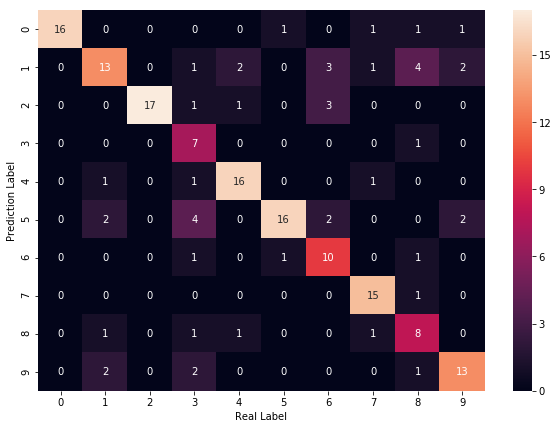

In [16]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [17]:
n_T = 0
for i in range(180):
    if list_P[i] == digits.target[1617+i]:
        n_T += 1
print("Accuracy:{}".format(n_T/180))

Accuracy:0.7277777777777777


In [18]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(2)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []

for winner in winner_list:
    used_nodes = list(winner.nodes.keys())
    # create a dict for mapping 
    l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
    l2 = range(len(l1))
    dict_nodes = dict(zip(l1, l2))

    ### 将节点加入图
    g = Graph(len(l1))# inputs + outputs + used  
    # add connections in the graph
    for cg in winner.connections.values():
        if cg.enabled:
            g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

    v = numbers
    list_connections = []
    for vi in v:
        for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
            list_connections.append(g.isReachable(u, vi))

    nodes_inputs = range(number_of_classification, number_of_classification+ 64)
    nodes_outputs = range(number_of_classification)
    nodes_mid = range(number_of_classification + 64, len(dict_nodes))

    # 找到所有输入和输出连接的路
    all_path = []
    for u in nodes_inputs:
        for v in nodes_outputs:
            path = findAllPath(g.graph, u, v)
            if path:
                all_path = all_path + path

    # 得到最长路，以及每个节点在哪个层级
    max_length = max([len(x) for x in all_path])
    nodes_tuples_list = []
    for path in all_path:
        #print(path)
        for node in path:
            nodes_tuples_list.append([node, path.index(node)])

    # 确定节点的层级（消除重复）       
    nodes_tuples_fixed_list = []
    for index in range(max_length):
        for nodes in nodes_tuples_list:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                if nodes not in nodes_tuples_fixed_list:
                    nodes_tuples_fixed_list.append(nodes)


    # 所有有连接的节点
    all_used_nodes = []
    for node in nodes_tuples_fixed_list:
        if node[0] not in all_used_nodes:
            all_used_nodes.append(node[0])

    # 确定节点的层级（最终确定）
    nodes_tuples_fixed_list_final = []

    for node in all_used_nodes:
        if node in nodes_inputs:
            nodes_tuples_fixed_list_final.append([node, 0])
        elif node in nodes_outputs:
            nodes_tuples_fixed_list_final.append([node, max_length - 1])
        else:
            list_node = []
            for nodes in nodes_tuples_fixed_list:
                if node == nodes[0]:
                    list_node.append(nodes)
            layer = 0
            for ele in list_node:
                # 删除重复项，取最大
                if ele[1] > layer:
                    layer = ele[1]
            nodes_tuples_fixed_list_final.append([node,layer])


    # 每个层级的节点合数
    length_of_layers = []
    number_of_nodes = 0
    for index in range(max_length):
        for nodes in nodes_tuples_fixed_list_final:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                number_of_nodes += 1
        length_of_layers.append(number_of_nodes)

    length_of_each_layer = []
    length_of_each_layer.append(length_of_layers[0])
    for i in range(1, max_length):
        length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

    # 输出每个层级的节点个数
    #print("length of each layers:", length_of_each_layer)

    # 所有端到端的路
    all_path_side2side = []
    for path in all_path:
        if len(path) == 2:
            all_path_side2side.append(path)
        else:
            for i in range(len(path)-1):
                all_path_side2side.append([path[i],path[i+1]])

    # 定义节点到绘图的字典
    dict_nodes_graph = dict()
    count_number_layer = [0] * max_length
    for nodes in nodes_tuples_fixed_list_final:
        node, layer = nodes
        dict_nodes_graph[node] = [count_number_layer[layer], layer]
        count_number_layer[layer] += 1
    list_nodes_number.append(np.sum(length_of_each_layer))
    list_connection_number.append(len(all_path_side2side))
    #print("Number of nodes:{} Number of connections:{}".format(np.sum(length_of_each_layer),len(all_path_side2side)))
print("Total nodes:{} Total connections::{}".format(np.sum(list_nodes_number), np.sum(list_connection_number)))

Total nodes:357 Total connections::784


In [22]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(10):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    pred_array = np.array(pred).reshape(10,)
    #print(pred_array)
    if (np.sum(pred_array) >= 1):
        pred_value.append(np.where(pred_array==1))
    else:
        pred_value.append(np.array(range(10)))

    #print(vote)

In [23]:
import random

list_P = []
for i in range(1617):
    if (len(pred_value[i])== 1):
        #print(pred_value[i][0], digits.target[1617+i])
        list_P.append(random.sample(pred_value[i][0].tolist(),1)[0])
    else:
        list_P.append(random.sample(pred_value[i].tolist(),1)[0])

In [24]:
n_T = 0
for i in range(1617):
    if list_P[i] == digits.target[i]:
        n_T += 1
print("Accuracy:{}".format(n_T/1617))

Accuracy:0.8188002473716759


In [21]:
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
avg_train_acc = np.mean(winner_fitness)
print("Avg Train Accuracy:{}".format(avg_train_acc))

Avg Train Accuracy:0.9747680890538033
